<div style="border:solid Green 2px; border-radius: 10px;  padding: 40px">
<b>Привет, Антон!👋</b>
    
Меня зовут Зуева Юлия, можно просто Юля 😏 Я буду ревьюером твоего проекта. Предлагаю обращаться на "ты", но если это неудобно, пожалуйста, скажи об этом! 
    
Моя основная цель - помочь тебе стать компетентным Data Scientist'ом: вместе преодолеть трудности и еще больше развить твои сильные навыки 💪 В твоей работе я оставила комментарии, которые должны в этом помочь. Для твоего удобства комментарии раскрашены разными цветами: 
<br/>
<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> В случае корректного решения (или отдельных его моментов). На такие решения можно опираться в будущем.
</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> Если есть возможность как-либо улучшить решение. Ты можешь учесть эти комментарии при доработке проекта, однако для зачета это не обязательно.
</div>
<div style="border-radius: 10px" class="alert alert-block alert-danger">
<b>Нужно доработать ❌:</b> Если решение требует внесения правок. Проект не может быть принят, если остались не отработанные комментарии данного типа.
</div>
    
Чтобы наша с тобой работа была еще эффективнее, ты точно так же можешь оставлять комментарии и задавать мне вопросы. Для таких случаев, пожалуйста, выбери собственное оформление комментариев, которое будет отличаться от моего, чтобы не создавалась путаница. По этой же причине попрошу тебя не удалять и не изменять мои комментарии. Все это позволит лучше ориентироваться в нашем с тобой диалоге, а повторную проверку (в случае ее необходимости) выполнять оперативнее 🚀
    
Не спеши расстраиваться, если что-то не удалось с первого раза. Вместе мы обязательно разберемся со всеми трудностями! 🤓

# Анализ лояльности пользователей Яндекс Афиши

<b>
Проведенная далее работа посвящена исследованию лояльности пользователей Яндекс Афиши, с целью выяснить какие параметры первой покупки влияют на возвращаемость пользователей на платформу
</b>

<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Вводная часть <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> В любой работе важно оставлять вводную часть. Она помогает быстро понять цель, контекст и структуру работы, что будет удобно не только для тебя при возвращении к проекту спустя время, но и любому другому читателю (если, например, публикуешь в открытый доступ для портфолио). Воспринимаем эту тетрадку не просто как выполнение домашней работы на курсе, а как полноценный исследовательский проект.

Како правило, во вводную часть включают название проекта, краткое описание цели, используемых данных (источники, объем, особенности), нюансы самого проекта (специфические условия, ограничения, предположения и т.д.). Иногда также сразу обозначают план шагов. Другими словами, вводная часть призвана отразить, что мы делаем, с чем работаем и на каких условиях.
</div>

<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера 2 ✅<a class="tocSkip"></h3>

Ну, в целом тоже неплохо!

## Этапы выполнения проекта

### 1. Загрузка данных и их предобработка

---

**Задача 1.1:** Напишите SQL-запрос, выгружающий в датафрейм pandas необходимые данные. Используйте следующие параметры для подключения к базе данных `data-analyst-afisha`:

- **Хост** — `rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net`
- **База данных** — `data-analyst-afisha`
- **Порт** — `6432`
- **Аутентификация** — `Database Native`
- **Пользователь** — `praktikum_student`
- **Пароль** — `Sdf4$2;d-d30pp`

Для выгрузки используйте запрос из предыдущего урока и библиотеку SQLAlchemy.

Выгрузка из базы данных SQL должна позволить собрать следующие данные:

- `user_id` — уникальный идентификатор пользователя, совершившего заказ;
- `device_type_canonical` — тип устройства, с которого был оформлен заказ (`mobile` — мобильные устройства, `desktop` — стационарные);
- `order_id` — уникальный идентификатор заказа;
- `order_dt` — дата создания заказа (используйте данные `created_dt_msk`);
- `order_ts` — дата и время создания заказа (используйте данные `created_ts_msk`);
- `currency_code` — валюта оплаты;
- `revenue` — выручка от заказа;
- `tickets_count` — количество купленных билетов;
- `days_since_prev` — количество дней от предыдущей покупки пользователя, для пользователей с одной покупкой — значение пропущено;
- `event_id` — уникальный идентификатор мероприятия;
- `service_name` — название билетного оператора;
- `event_type_main` — основной тип мероприятия (театральная постановка, концерт и так далее);
- `region_name` — название региона, в котором прошло мероприятие;
- `city_name` — название города, в котором прошло мероприятие.

---


In [2]:
import os
import math
from sqlalchemy import create_engine
import pandas as pd
from pandas import DataFrame
import phik
import matplotlib.pyplot as plt
import seaborn as sns

<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Импорты <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> Здорово, что все необходимые библиотеки подгружаешь сразу в начале проекта! Это соответствует стандартам оформления кода <a href='https://pyplanet.ru/article/pep-0008.html'>PEP 8</a>. Такой подход позволяет сразу видеть, какое окружение необходимо для запуска проекта, избежать дублирования импортов в разных частях кода, а также облегчить отладку и переносимость проекта.

</div>

<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b>

* Чтобы при установке новой библиотеки не выводилась информация о процессе и зависимостях, можно добавлять опцию `--quiet` или просто `-q`. 
    
    
* Восклицательный знак перед установкой позволяет проводить ее в ячейках с другим кодом.
    
 
* Хорошей практикой также является упорядочивание импортов. PEP 8 рекомендует сначала подгружать стандартные python-библиотеки, затем сторонние. Но для удобства каждую их этих групп также можно структурировать по тематике. Например, библиотеки для работы с данными, для работы с графиками и т.д. Так удобнее поддерживать порядок в импортах от проекта к проекту, не подгружать лишнее.

    
</div>

In [3]:
db_config = {'user': os.getenv('DB_USER'), # имя пользователя
             'pwd': os.getenv('DB_PASSWORD'), # пароль
             'host': os.getenv('DB_HOST'),
             'port': os.getenv('DB_PORT'), # порт подключения
             'db': os.getenv('DB_NAME') # название базы данных
             }

In [4]:
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

In [5]:
engine = create_engine(connection_string)

In [6]:
def query_generator(table_name):
    return f'SELECT * FROM afisha.{table_name}'

def get_df(table_name):
    
    query = query_generator(table_name)
    
    with engine.connect() as conn:
        df = pd.read_sql_query(query, con=conn)
    
    return 

def collect_db_data_to_dataframes(schema_name) -> dict[str, DataFrame]:
    
    tables_query = f'''
    select table_name from information_schema.tables
    where table_schema = '{schema_name}'
    '''
        
    table_names = []
    with engine.connect() as conn:
        result = conn.execute(tables_query)
        for row in result:
            table_names.append(row[0])
    
    dfs = dict()
    for table_name in table_names:
        dfs[table_name] = get_df(table_name)
        
    return dfs

In [ ]:
# Содержит сырые данные по таблицам
dataframes = collect_db_data_to_dataframes('afisha')

In [ ]:
for df in dataframes.values():
    df.info()
    print('\n\n\n')

In [7]:
interested_dataframe_query = '''
select 
  p.user_id,
  p.device_type_canonical,
  p.order_id,
  p.created_dt_msk as order_dt,
  p.created_ts_msk as order_ts,
  p.currency_code,
  p.revenue,
  p.tickets_count,
  p.event_id,
  e.event_name_code as event_name,
  e.event_type_main,
  p.service_name,
  c.city_name,
  r.region_name,
  EXTRACT(day FROM  p.created_dt_msk - lag(p.created_dt_msk) over (partition by user_id order by p.created_dt_msk)) as days_since_prev 
from afisha.purchases p
  join afisha.events e using(event_id)
  join afisha.city c using(city_id)
  join afisha.regions r using(region_id)
where p.device_type_canonical in ('mobile', 'desktop') and e.event_type_main != 'фильм'
order by user_id asc
'''

interested_dataframe = pd.read_sql_query(interested_dataframe_query, con=engine)
idf = interested_dataframe

<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Загрузка данных <a class="tocSkip"></h4>
    
<div style="border-radius: 10px" class="alert alert-block alert-danger">
 
<b>Нужно доработать ❌:</b> Обрати внимание, что для анализа нам требовались не все данные. Необходимо наложить фильтрацию на тип устройства и мероприятия.
    
</div>

<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> Сейчас ты явным образом прописываешь параметры подключения к БД. В таком виде выкладывать работу в публичный доступ небезопасно, кто-то сможет завладеть подключением, украсть или повредить данные. Лучше сразу в процессе работы держать чувствительные значения отдельно от основного содержания, иначе есть высокий риск забыть об этом нюансе. 
    
Чтобы засекретить подключение, необходимо сложить все параметры в `.env` файл (или другой конфигурационный файл вне Git) и указать его в `.gitignore`:

```python
DB_NAME="..."
DB_HOST="..."
DB_PORT="..."
DB_USER="..."
DB_PASSWORD="..."
```
    
В самом проекте мы можем обращаться к сохраненным параметрам, для этого нам потребуются библиотеки `dotenv`, чтобы загрузить переменные окружения, и `os`, чтобы обратиться к ним:
    
```python
import os
import dotenv
    
load_dotenv() # автоматически ищет .env в текущей директории
    
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    os.getenv('DB_USER'),
    os.getenv('DB_PASSWORD'),
    os.getenv('DB_HOST'),
    os.getenv('DB_PORT'),
    os.getenv('DB_NAME'),
) 
```

Также данный файл можно добавить в репозиторий и здесь на платформе. Для этого нужно нажать на лого jupyter hub, найти кнопку для создания нового файла, внести необходимое содержимое, переименовать файл нужным образом и сохранить.
    
</div>

<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера 2 ✅<a class="tocSkip"></h3>

---

**Задача 1.2:** Изучите общую информацию о выгруженных данных. Оцените корректность выгрузки и объём полученных данных.

Предположите, какие шаги необходимо сделать на стадии предобработки данных — например, скорректировать типы данных.

Зафиксируйте основную информацию о данных в кратком промежуточном выводе.

---

<b>Вывод первых десяти строк датасета</b>

In [8]:
idf.head(10)

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,event_id,event_name,event_type_main,service_name,city_name,region_name,days_since_prev
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.94,4,169230,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,театр,Край билетов,Глиногорск,Каменевский регион,NaN
1,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.45,2,237325,40efeb04-81b7-4135-b41f-708ff00cc64c,выставки,Мой билет,Глиногорск,Каменевский регион,NaN
2,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.57,4,578454,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,другое,За билетом!,Глиногорск,Каменевский регион,75.0
3,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.49,2,387271,2f638715-8844-466c-b43f-378a627c419f,другое,Лови билет!,Озёрск,Североярская область,NaN
4,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.41,3,509453,10d805d3-9809-4d8a-834e-225b7d03f95d,стендап,Билеты без проблем,Родниковецк,Озернинский край,83.0
5,000898990054619,mobile,2613713,2024-10-23,2024-10-23 15:12:00,rub,902.74,3,500862,9cc55c15-4375-4129-9979-3129688ba1b4,концерты,Облачко,Кристалевск,Лугоградская область,19.0
6,00096d1f542ab2b,desktop,6636941,2024-08-15,2024-08-15 16:48:48,rub,917.83,4,201953,2f98d69f-4e60-4ffc-8f16-e539383526b1,театр,Край билетов,Глиногорск,Каменевский регион,NaN
7,000a55a418c128c,mobile,4657981,2024-09-29,2024-09-29 19:39:12,rub,47.78,1,265857,0d876e01-851e-458b-ba61-753e0e0c4063,театр,Лучшие билеты,Дальнозолотск,Поленовский край,NaN
8,000a55a418c128c,mobile,4657952,2024-10-15,2024-10-15 10:29:04,rub,74.84,2,271579,ddc795f8-7ef8-4eb0-b299-cb3e6ee24ba1,театр,Лучшие билеты,Дальнозолотск,Поленовский край,16.0
9,000cf0659a9f40f,mobile,6818017,2024-06-20,2024-06-20 10:35:26,rub,1421.91,4,516728,11be386f-7cb7-4aa1-a8e4-ba73a29c1af2,концерты,Лови билет!,Радужнополье,Широковская область,NaN


<b>Вывод размерности датасета</b>

In [9]:
idf.shape

(290611, 15)

<b>Вывод колонок с пропусками</b>

In [10]:
idf.isna().sum()

user_id                      0
device_type_canonical        0
order_id                     0
order_dt                     0
order_ts                     0
currency_code                0
revenue                      0
tickets_count                0
event_id                     0
event_name                   0
event_type_main              0
service_name                 0
city_name                    0
region_name                  0
days_since_prev          21933
dtype: int64

<b>Вывод информации о типах данных колонок</b>

In [11]:
idf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290611 entries, 0 to 290610
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  object        
 2   order_id               290611 non-null  int64         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  object        
 6   revenue                290611 non-null  float64       
 7   tickets_count          290611 non-null  int64         
 8   event_id               290611 non-null  int64         
 9   event_name             290611 non-null  object        
 10  event_type_main        290611 non-null  object        
 11  service_name           290611 non-null  object        
 12  city_name              290611 non-null  obje

<b>Вывод информации о количестве уникальных значений</b>

In [12]:
idf.nunique()

user_id                   21933
device_type_canonical         2
order_id                 290611
order_dt                    153
order_ts                 280753
currency_code                 2
revenue                   42522
tickets_count                22
event_id                  22427
event_name                15248
event_type_main               7
service_name                 36
city_name                   352
region_name                  81
days_since_prev             149
dtype: int64

<b>Проверка данных на явные дубликаты</b>

<b>Првоерка на полное совпадение строк</b>

In [13]:
idf.duplicated().sum()

0

<b>Првоерка на совпадение order_id</b>

In [14]:
idf[['order_id']].duplicated().sum()

0

<b>Проверка категориальных данных на значения отличающиеся регистром</b>

In [15]:
initital = len(idf['event_type_main'].unique())
lowered = len(idf['event_type_main'].str.lower().unique())

initital == lowered

True

In [16]:
initital = len(idf['city_name'].unique())
lowered = len(idf['city_name'].str.lower().unique())

initital == lowered

True

In [17]:
initital = len(idf['region_name'].unique())
lowered = len(idf['region_name'].str.lower().unique())

initital == lowered

True

In [18]:
initital = len(idf['service_name'].unique())
lowered = len(idf['service_name'].str.lower().unique())

initital == lowered

True

<b>Поиск невалидных значений в числовых данных</b>

In [19]:
idf[idf['revenue'] < 0]['revenue'].count()

381

In [20]:
idf[idf['tickets_count'] < 0]['tickets_count'].count()

0

In [21]:
idf[idf['days_since_prev'] < 0]['days_since_prev'].count()

0

<b>
<p>Резюмируем предварительный анализ данных.</p>
<ul>
    <li>Размер составляет 292034 строк и 14 столбцов</li>
    <li>Пропуски присутствуют только в колонке days_since_prev. Отсутствие пропуска в купе с количеством уникальных пользователей означает, что это первый заказ пользователя. </li>
    <li>Типы данных корректны во всех колонках. Исключение составляет та же колонка days_since_prev, из-за наличия NaN значений</li>
    <li>Количество заказов 292034</li>
    <li>Количество пользователей 22000</li>
    <li>Количество валют 2</li>
    <li>Дубликатов среди данных не найдено</li>
</ul>
<p>Из полученой информации, о данных можно сделать вывод. Необходима корректировка выручки, т.к. некорректно сравнивать две суммы в разных валютах. Также необходимо удалить строки, содержащие отрицательное значение прибыли, их найдено 381.</p>
</b>

<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Проверка корректности загруженных данных <a class="tocSkip"></h4>
<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> 

* Хорошо, что убеждаешь в корректности данных! Если при подгрузке возникли проблемы, а мы их не обнаружим, все последующие расчеты могут быть искажены.

    
* Круто, что не забываешь зафиксировать промежуточные наблюдения в выводах! Если потребуется вернуться к проекту спустя время, будет проще освежить в памяти все ключевые этапы работы, что и почему мы делали, что получили.

</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> По результатам проверки корректности загруженных данных мы планируем дальнейшие шаги по обработке. Здесь можно было бы отметить, что нам потребуется привести выручку к единой валюте, убедиться, что пропуски действительно имеются только у первых заказов, выполнить проверку на дубликаты (полные и неполные), проверить категориальные столбцы на предмет неявных дубликатов (разный регистр, разный формат записи, опечатки) и все числовые столбцы на наличие невалидных значений и аномалий, опционально сменить типы данных на более оптимальные, чтобы уменьшить объем занимаемой памяти.
    
</div>

<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера 2 ✅<a class="tocSkip"></h3>

---

###  2. Предобработка данных

Выполните все стандартные действия по предобработке данных:

---

**Задача 2.1:** Данные о выручке сервиса представлены в российских рублях и казахстанских тенге. Приведите выручку к единой валюте — российскому рублю.

Для этого используйте датасет с информацией о курсе казахстанского тенге по отношению к российскому рублю за 2024 год — `final_tickets_tenge_df.csv`. Его можно загрузить по пути `https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')`

Значения в рублях представлено для 100 тенге.

Результаты преобразования сохраните в новый столбец `revenue_rub`.

---


In [22]:
currency_df = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')

In [23]:
currency_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


<b>Необходима корректировка типа данных у колонки date на datetime64[ns]. Это позволит нам выпонить merge датасетов</b>

In [24]:
currency_df['data'] = pd.to_datetime(currency_df['data'])

In [25]:
currency_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   data     357 non-null    datetime64[ns]
 1   nominal  357 non-null    int64         
 2   curs     357 non-null    float64       
 3   cdx      357 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 11.3+ KB


In [26]:
currency_df.head(5)

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


<b>Проверим, что по каждой дате есть курс валют. Во первыых посчитаем количество таких строк, во вторых проведем замену.</b>

In [27]:
idf[idf['currency_code'] == 'kzt']['user_id'].count()

5069

<b>Получилось 5069 строк, у которых валюта указана в kzt.</b>

<b>Убедимся, что для каждой записи в датасете есть курс, по которому мы можем сконвертировать выручку.</b>

In [28]:
no_data_found_rows = idf[~idf['order_dt'].isin(currency_df['data'])]
no_data_found_rows['order_dt'].count()

0

<b>Вывод: для каждой строки есть курс валюты. Можем приступать к конвертации</b>

<b>Проведем замену выручки в kzt в рубли</b>

In [29]:
currency_adjusted_df = pd.merge(idf, currency_df, left_on='order_dt', right_on='data')

currency_adjusted_df['revenue_rub'] = currency_adjusted_df['revenue'].where(currency_adjusted_df['currency_code'] == 'rub', currency_adjusted_df['revenue'] * currency_adjusted_df['curs'] / 100)

currency_adjusted_df = currency_adjusted_df.drop(columns=list(currency_df.columns))

display(currency_adjusted_df[currency_adjusted_df['currency_code'] == 'kzt'][['user_id', 'currency_code', 'revenue', 'revenue_rub']].head(5))

cadf = currency_adjusted_df

,user_id,currency_code,revenue,revenue_rub
70,0033403583a55ed,kzt,518.10,98.503762
89,0040e12d70fae81,kzt,347.18,65.731589
96,0054b38b2653e6e,kzt,328.77,61.148261
277,00f4f5244501ce6,kzt,22021.55,4380.702898
460,01370a0e9c1a7d5,kzt,7397.66,1478.296591


<b>Для перевода из kzt в rub была применена формула revenue_rub = revenue * curs / 100</b>

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Перевод выручки в рубли <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> С шагом справились, результат корректный!
</div>

<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 
    
* Сперва следовало убедиться в корректности данных с курсом, по всем ли датам есть курс, адекватные ли там значения, нет ли дубликатов, а уже потом переходить к конвертации.


* Вместо цикличного `apply`, который за раз работает с одной строкой, можно использовать довольно удобный метод [where](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html). Мы можем присоединить курс к нашей таблице с пользователями, применить данный метод к столбцу с выручкой и указать условие, которое будем проверять, а также альтернативный вариант значения. Если условие выполняется, то берется значение из столбца, если нет - альтернативное значение. Тогда расчет выручки в рублях будет выглядеть следующим образом:
    
    ```python
df['revenue_rub'] = df['revenue'].where(df['currency_code'] == 'rub', df['revenue'] * df['curs'] / 100)
```

* После проведения каких-либо манипуляций с данными необходимо убеждаться, что все выполнилось корректно. Для проверки результата стоит вывести на обозрение только связанные с данной задачей столбцы, чтобы не перегружать читателя лишним. При этом проверить оба кейса, и когда корректировка требовалась, и когда нет, убедиться, что не образовалось пропусков.
    
 
* Это исследовательская работа, а не скрипт, поэтому важно фиксировать свой ход мыслей, пояснять свои шаги и делать выводы относительно результатов, то есть вести последовательный сторителлинг, что зачем и почему мы делаем, что по итогу получаем, достигли ли нужного нам результата.

</div>

<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера 2 ✅<a class="tocSkip"></h3>

---

**Задача 2.2:**

- Проверьте данные на пропущенные значения. Если выгрузка из SQL была успешной, то пропуски должны быть только в столбце `days_since_prev`.
- Преобразуйте типы данных в некоторых столбцах, если это необходимо. Обратите внимание на данные с датой и временем, а также на числовые данные, размерность которых можно сократить.
- Изучите значения в ключевых столбцах. Обработайте ошибки, если обнаружите их.
    - Проверьте, какие категории указаны в столбцах с номинальными данными. Есть ли среди категорий такие, что обозначают пропуски в данных или отсутствие информации? Проведите нормализацию данных, если это необходимо.
    - Проверьте распределение численных данных и наличие в них выбросов. Для этого используйте статистические показатели, гистограммы распределения значений или диаграммы размаха.
        
        Важные показатели в рамках поставленной задачи — это выручка с заказа (`revenue_rub`) и количество билетов в заказе (`tickets_count`), поэтому в первую очередь проверьте данные в этих столбцах.
        
        Если обнаружите выбросы в поле `revenue_rub`, то отфильтруйте значения по 99 перцентилю.

После предобработки проверьте, были ли отфильтрованы данные. Если были, то оцените, в каком объёме. Сформулируйте промежуточный вывод, зафиксировав основные действия и описания новых столбцов.

---

<b>Проверка данных на пропущенные значений</b>

In [30]:
cadf.isna().sum()

user_id                      0
device_type_canonical        0
order_id                     0
order_dt                     0
order_ts                     0
currency_code                0
revenue                      0
tickets_count                0
event_id                     0
event_name                   0
event_type_main              0
service_name                 0
city_name                    0
region_name                  0
days_since_prev          21933
revenue_rub                  0
dtype: int64

<b>Проверка на некорректные значения</b>

In [31]:
cadf.aggregate(
    {
        'revenue': ['min', 'max'],
        'revenue_rub': ['min', 'max'],
        'days_since_prev': ['min', 'max'],
        'order_dt': ['min', 'max'],
        'order_ts': ['min', 'max'],

    }
)

,revenue,revenue_rub,days_since_prev,order_dt,order_ts
min,-90.76,-90.76,0.0,2024-06-01,2024-06-01 00:00:42
max,81174.54,81174.54,148.0,2024-10-31,2024-10-31 23:59:54


In [32]:
number_of_negative_revenue_rows = cadf[cadf['revenue_rub'] < 0]['revenue_rub'].count()

In [33]:
f'Количество строк с отрицательным значением прибыли: {number_of_negative_revenue_rows}'

'Количество строк с отрицательным значением прибыли: 381'

<b>Получаем 381 строку где прибль отрпцательна. Выполним удаление этих строк, т.е. по сравнению с общим количеством строк это значение значительно мало.</b>

In [34]:
cadf = cadf[cadf['revenue_rub'] > 0].copy()
cadf[cadf['revenue_rub'] < 0]['revenue_rub'].count()

0

In [35]:
cadf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284704 entries, 0 to 290610
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                284704 non-null  object        
 1   device_type_canonical  284704 non-null  object        
 2   order_id               284704 non-null  int64         
 3   order_dt               284704 non-null  datetime64[ns]
 4   order_ts               284704 non-null  datetime64[ns]
 5   currency_code          284704 non-null  object        
 6   revenue                284704 non-null  float64       
 7   tickets_count          284704 non-null  int64         
 8   event_id               284704 non-null  int64         
 9   event_name             284704 non-null  object        
 10  event_type_main        284704 non-null  object        
 11  service_name           284704 non-null  object        
 12  city_name              284704 non-null  object   

<b>Выполним преобразование типов данных</b>

In [36]:
cadf['tickets_count'] = pd.to_numeric(cadf['tickets_count'], downcast='integer')
cadf['revenue_rub'] = pd.to_numeric(cadf['revenue_rub'], downcast='float')
cadf['days_since_prev'] = pd.to_numeric(cadf['days_since_prev'], downcast='float')
cadf['region_name'] = cadf['region_name'].astype('category')
cadf['event_type_main'] = cadf['event_type_main'].astype('category')
cadf['service_name'] = cadf['service_name'].astype('category')
cadf['device_type_canonical'] = cadf['device_type_canonical'].astype('category')
cadf['currency_code'] = cadf['currency_code'].astype('category')

In [37]:
cadf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284704 entries, 0 to 290610
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                284704 non-null  object        
 1   device_type_canonical  284704 non-null  category      
 2   order_id               284704 non-null  int64         
 3   order_dt               284704 non-null  datetime64[ns]
 4   order_ts               284704 non-null  datetime64[ns]
 5   currency_code          284704 non-null  category      
 6   revenue                284704 non-null  float64       
 7   tickets_count          284704 non-null  int8          
 8   event_id               284704 non-null  int64         
 9   event_name             284704 non-null  object        
 10  event_type_main        284704 non-null  category      
 11  service_name           284704 non-null  category      
 12  city_name              284704 non-null  object   

<b>Проверка колонок с номинальными данными на их уникальность с целью поиска значений обозначающих пропуски</b>

In [38]:
cadf['device_type_canonical'].unique()


['mobile', 'desktop']
Categories (2, object): ['desktop', 'mobile']

In [39]:
cadf['currency_code'].unique()

['rub', 'kzt']
Categories (2, object): ['kzt', 'rub']

In [40]:
cadf['service_name'].unique()

['Край билетов', 'Мой билет', 'За билетом!', 'Лови билет!', 'Билеты без проблем', ..., 'Цвет и билет', 'Зе Бест!', 'Тех билет', 'Лимоны', 'Билеты в интернете']
Length: 36
Categories (36, object): ['Crazy ticket!', 'Show_ticket', 'Билет по телефону', 'Билеты без проблем', ..., 'Тех билет', 'Цвет и билет', 'Шоу начинается!', 'Яблоко']

In [41]:
cadf['event_type_main'].unique()

['театр', 'выставки', 'другое', 'стендап', 'концерты', 'ёлки', 'спорт']
Categories (7, object): ['выставки', 'другое', 'концерты', 'спорт', 'стендап', 'театр', 'ёлки']

In [42]:
cadf['region_name'].unique()

['Каменевский регион', 'Североярская область', 'Озернинский край', 'Лугоградская область', 'Поленовский край', ..., 'Сосноводолинская область', 'Верхозёрский край', 'Лесноярский край', 'Теплоозёрский округ', 'Лесополянская область']
Length: 81
Categories (81, object): ['Белоярская область', 'Берестовский округ', 'Берёзовская область', 'Боровлянский край', ..., 'Широковская область', 'Яблоневская область', 'Ягодиновская область', 'Яснопольский округ']

In [43]:
cadf['city_name'].unique()

array(['Глиногорск', 'Озёрск', 'Родниковецк', 'Кристалевск',
       'Дальнозолотск', 'Радужнополье', 'Кумсай', 'Верховино',
       'Светополье', 'Кокжар', 'Каменский', 'Лесоярич', 'Никольянов',
       'Речинцево', 'Лесозолотск', 'Дальнозерск', 'Серебрянка',
       'Островецк', 'Родниковец', 'Дальнесветск', 'Луговаярово',
       'Дальнополин', 'Ягодиновка', 'Солчелуг', 'Озёрчане', 'Радужсвет',
       'Серебровино', 'Лесоярово', 'Глинополье', 'Глиноград',
       'Дальнесветин', 'Северополье', 'Теплоозеро', 'Горнодолинск',
       'Ордакент', 'Озёрово', 'Луговинск', 'Лугоград', 'Крутовинск',
       'Сарыжар', 'Сосновечин', 'Тихоярск', 'Яблонецк', 'Жаркентай',
       'Широковка', 'Синеводов', 'Синеводск', 'Тихосветск', 'Радужанов',
       'Глиногорь', 'Каменосветск', 'Родниковск', 'Травогород',
       'Глинянск', 'Радужинск', 'Поляногорье', 'Дальнолесье', 'Ручейник',
       'Ключеград', 'Златопольск', 'Ключеводск', 'Поленовино',
       'Речичанск', 'Ключевополье', 'Дальнесоснов', 'Ордасай',

<b>В колонках device_type_canonical и event_type_main присутствуют данные отражающие пропуски, а именно "other" и "другое" соответственно. Нормализацию данных проводить не требуется.</b>

<b>Убедимся, что пропуски присутствуют только в колонке days_siince_prev. Так как по факту в данной колонке целочисленные значения, переведем её тип в Int</b>

In [44]:
cadf.isna().sum()

user_id                      0
device_type_canonical        0
order_id                     0
order_dt                     0
order_ts                     0
currency_code                0
revenue                      0
tickets_count                0
event_id                     0
event_name                   0
event_type_main              0
service_name                 0
city_name                    0
region_name                  0
days_since_prev          21589
revenue_rub                  0
dtype: int64

In [45]:
cadf[['days_since_prev']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 284704 entries, 0 to 290610
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   days_since_prev  263115 non-null  float32
dtypes: float32(1)
memory usage: 3.3 MB


In [46]:
cadf['days_since_prev'] = cadf['days_since_prev'].astype('Int64')

In [47]:
cadf[['days_since_prev']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 284704 entries, 0 to 290610
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   days_since_prev  263115 non-null  Int64
dtypes: Int64(1)
memory usage: 4.6 MB


In [48]:
cadf['days_since_prev'] = pd.to_numeric(cadf['days_since_prev'], downcast='integer')

In [49]:
cadf[['days_since_prev']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 284704 entries, 0 to 290610
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   days_since_prev  263115 non-null  Int16
dtypes: Int16(1)
memory usage: 3.0 MB


<b>Анализ числовых данных на наличие выбросов</b>

In [50]:
# удаляем колонки с идентификаторами и revenue, т.к. дальнейщий анализ проводим по revenue_rub

cadf.describe().drop(columns=['revenue', 'order_id', 'event_id'])

,order_dt,order_ts,tickets_count,days_since_prev,revenue_rub
count,284704,284704,284704.000000,263115.0,284704.000000
mean,2024-09-02 17:56:26.658424576,2024-09-03 08:52:42.083830784,2.758184,3.250164,567.102254
min,2024-06-01 00:00:00,2024-06-01 00:00:42,1.000000,0.0,0.020000
25%,2024-07-31 00:00:00,2024-07-31 18:09:46.500000,2.000000,0.0,124.730000
50%,2024-09-13 00:00:00,2024-09-13 15:03:37,3.000000,0.0,364.280000
75%,2024-10-10 00:00:00,2024-10-10 05:13:47.249999872,4.000000,1.0,811.610000
max,2024-10-31 00:00:00,2024-10-31 23:59:54,47.000000,148.0,81174.540000
std,NaN,NaN,1.164946,11.41278,880.828883


In [51]:
def bp_hp_make(df, title, xlabel, column_name):

    f, (boxplot, histplot) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(16, 12))

    sns.boxplot(data=df[column_name], orient="h", ax=boxplot)
    sns.histplot(data=df, x=column_name, ax=histplot)
    
    boxplot.set(xlabel=xlabel, title=title)
    histplot.set(xlabel=xlabel, title=title)

    plt.show()
    plt.close()

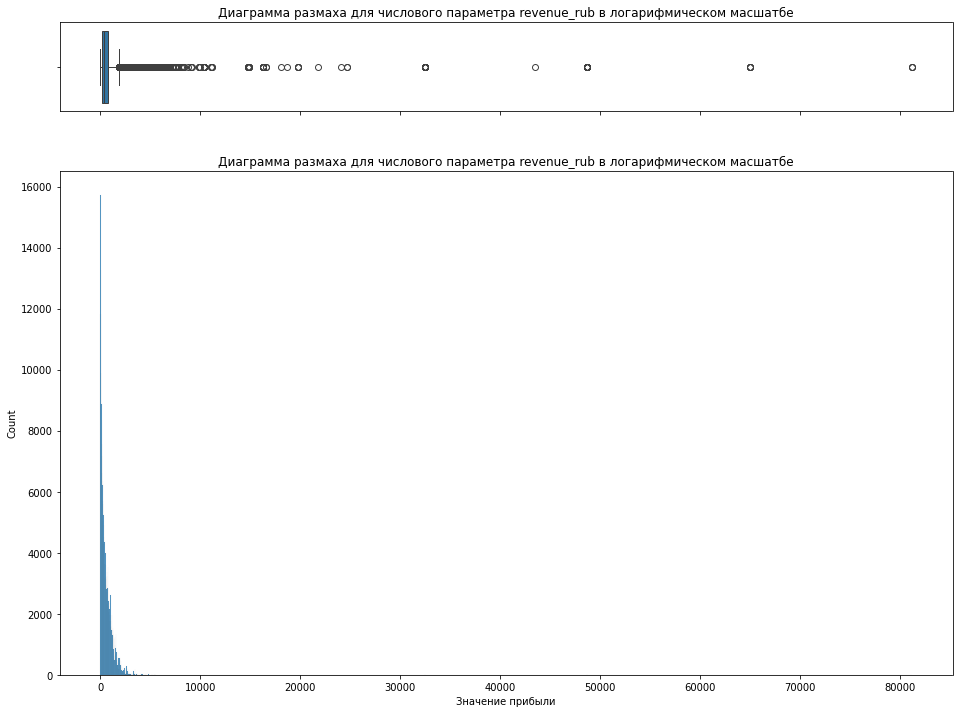

In [52]:
bp_hp_make(cadf, 'Диаграмма размаха для числового параметра revenue_rub в логарифмическом масшатбе', 'Значение прибыли', 'revenue_rub')

<b>Обнаружены выбросы в revenue_rub. Фильтруем данные по перцентилю 0.99</b>

In [53]:
quantile_revenue_rub_99 = cadf['revenue_rub'].quantile(0.99)

In [54]:
number_of_excluded_spike_revenue_rub_rows = cadf[cadf['revenue_rub'] >= quantile_revenue_rub_99]['revenue_rub'].count()

In [55]:
print(f'Количество строк с вревышением 99 перцентиля: {number_of_excluded_spike_revenue_rub_rows}')

Количество строк с вревышением 99 перцентиля: 3007


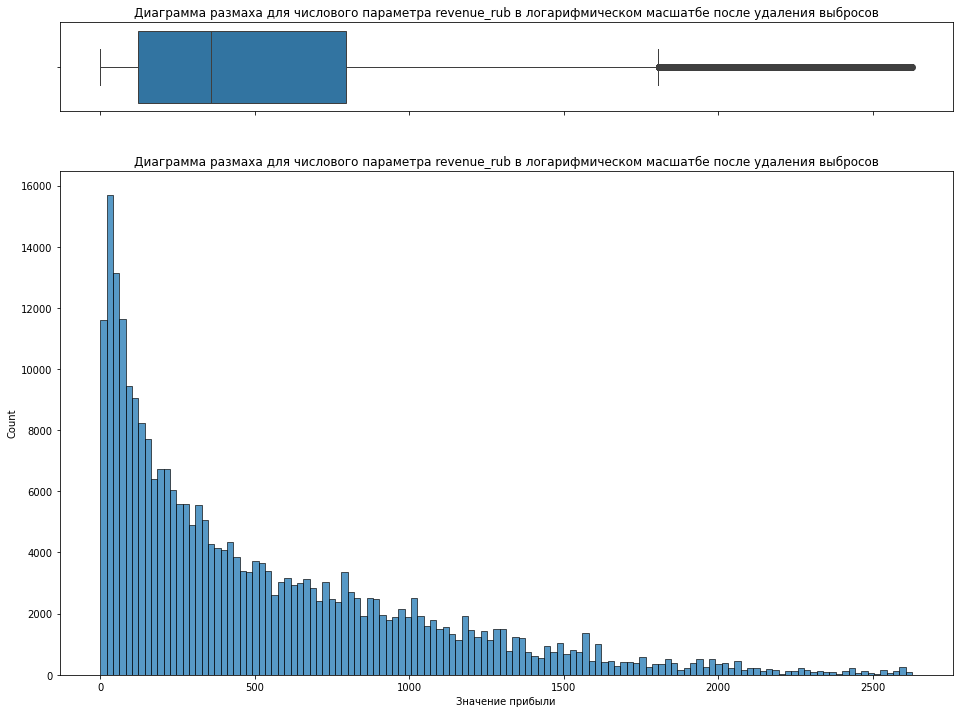

In [56]:
bp_hp_make(cadf[cadf['revenue_rub'] < quantile_revenue_rub_99], 'Диаграмма размаха для числового параметра revenue_rub в логарифмическом масшатбе после удаления выбросов', 'Значение прибыли', 'revenue_rub')

In [57]:
cadf = cadf[cadf['revenue_rub'] < quantile_revenue_rub_99].copy()

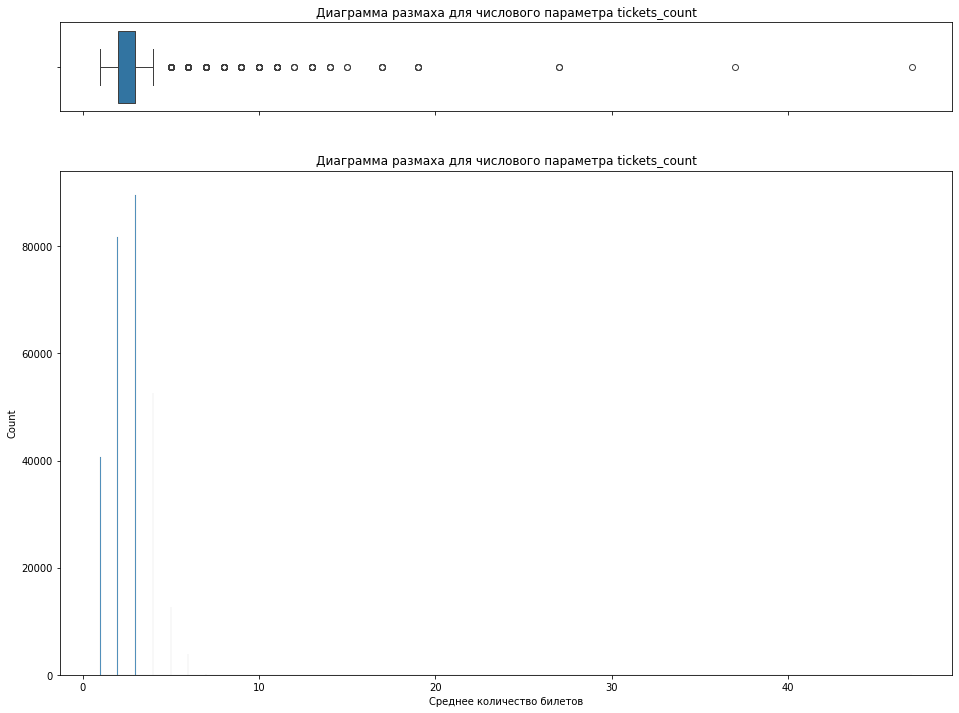

In [58]:
bp_hp_make(cadf, 'Диаграмма размаха для числового параметра tickets_count', 'Среднее количество билетов', 'tickets_count')

In [59]:
quantile_tickets_count_99 = cadf['tickets_count'].quantile(0.99)
print('Квантиль 0.99 отсучения выбросов в количестве купленных билетов', quantile_tickets_count_99)

Квантиль 0.99 отсучения выбросов в количестве купленных билетов 6.0


In [60]:
number_of_excluded_spike_tickets_count_rows = cadf[cadf['tickets_count'] >= quantile_tickets_count_99]['tickets_count'].count()

In [61]:
print(f'Количество строк с вревышением 99 перцентиля: {number_of_excluded_spike_tickets_count_rows}')

Количество строк с вревышением 99 перцентиля: 4094


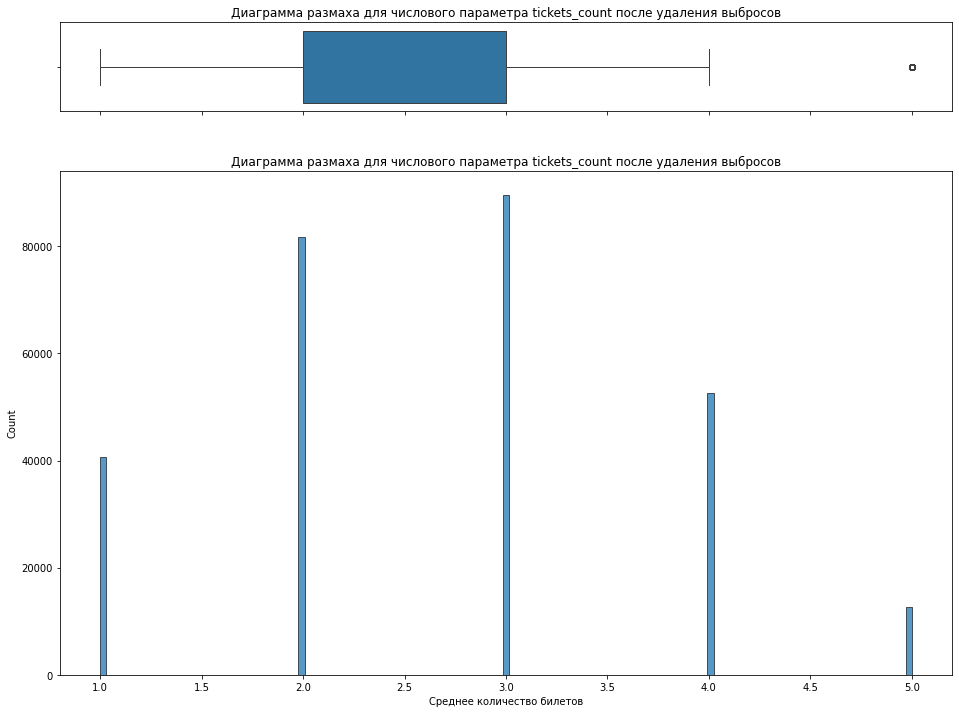

In [62]:
bp_hp_make(cadf[cadf['tickets_count'] < quantile_tickets_count_99], 'Диаграмма размаха для числового параметра tickets_count после удаления выбросов', 'Среднее количество билетов', 'tickets_count')

In [63]:
cadf = cadf[cadf['tickets_count'] < quantile_tickets_count_99].copy()

In [64]:
number_of_excluded_spike_rows = number_of_excluded_spike_revenue_rub_rows + number_of_excluded_spike_tickets_count_rows
number_of_excluded_rows = number_of_excluded_spike_rows + number_of_negative_revenue_rows
print(f'Количество исключенных строк {number_of_excluded_rows}')

Количество исключенных строк 7482


<b>Убедимся, что пропуски присутствуют только в колонке days_siince_prev. Так как по факту в данной колонке целочисленные значения, переведем её тип в Int</b>

In [65]:
cadf.isna().sum()

user_id                      0
device_type_canonical        0
order_id                     0
order_dt                     0
order_ts                     0
currency_code                0
revenue                      0
tickets_count                0
event_id                     0
event_name                   0
event_type_main              0
service_name                 0
city_name                    0
region_name                  0
days_since_prev          21050
revenue_rub                  0
dtype: int64

In [66]:
cadf[['days_since_prev']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 277603 entries, 0 to 290610
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   days_since_prev  256553 non-null  Int16
dtypes: Int16(1)
memory usage: 2.9 MB


In [67]:
cadf[['days_since_prev']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 277603 entries, 0 to 290610
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   days_since_prev  256553 non-null  Int16
dtypes: Int16(1)
memory usage: 2.9 MB


In [68]:
cadf[['days_since_prev']].aggregate({'days_since_prev': ['min', 'max']})

,days_since_prev
min,0
max,148


<b>Максимальное значение составляет 148, достаточно размерности Int8. Приведем тип данных к минимальному.</b>

In [69]:
cadf['days_since_prev'] = cadf['days_since_prev'].astype('Int16')

In [70]:
cadf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277603 entries, 0 to 290610
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                277603 non-null  object        
 1   device_type_canonical  277603 non-null  category      
 2   order_id               277603 non-null  int64         
 3   order_dt               277603 non-null  datetime64[ns]
 4   order_ts               277603 non-null  datetime64[ns]
 5   currency_code          277603 non-null  category      
 6   revenue                277603 non-null  float64       
 7   tickets_count          277603 non-null  int8          
 8   event_id               277603 non-null  int64         
 9   event_name             277603 non-null  object        
 10  event_type_main        277603 non-null  category      
 11  service_name           277603 non-null  category      
 12  city_name              277603 non-null  object   

<b>
    <p>В результате проведенного анализа можно сделать вывод. </p>
    <p>Анализ дубликатов был проведен в преданализе данных Дубликаты не обнаружены, необходимости в пересчете days_since_prev нет.</p>
    <p>В данных присутствуют строки с отраицательным значением прибыли, их 381, а также строки содержашие выбрсы по прибыли, их 3007 и строки с выбросами по количеству купленных билетов 4094. В сумме было исключено 7482 строки, что составляет 7482 / 292034 * 100 = 2,56%) от всего датасета. Удаление такого количества строк незначительно. Все строки с отрицательным значением прибыли были удалены из датасета. Для выбросов были построены диаграммы размаха в логарифмическом масштабе до и после удаления значений прибыли, превышающих 99 перцентиль.</p>
    <p>Была проведена корректировка значения прибыли путем конверсии значений прибыли в kzt в rub. В результате была добавлена колонка revenue_rub содержащая в рублях.</p>
    <p>Также, был проведен анализ уникальных значений колонок с номинальными значениями, что позволило выявить, что в колонках  device_type_canonical и event_type_main присутствуют данные отражающие пропуски, а именно "other" и "другое" соответственно.</p>
    <p>Было проведено уменьшение размерности у колонок tickets_count, revenue_rub, days_since_prev</p>
    <p>Тип данных категориальных колонок тоже был приведен к category, что значительно уменьшило размерность в МБ датасета region_name, event_type_main, service_name, device_type_canonical, currency_code</p>
        <p>В колонке days_since_prev не присутствует неадекватных значений, находятся в диапазоне от 0 до 148</p>
</b>


<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Предобработка данных <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> C задачей в целом справились, предобработку провели!

</div>
<div style="border-radius: 10px" class="alert alert-block alert-danger">
 
<b>Нужно доработать ❌:</b> В задании это не указывается, но по умолчанию важным шагом предварительного анализа и предобработки является проверка на наличие дубликатов.
    
</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации 💡:</b> 
    
* Дубликаты могут быть в том числе и неполные, например, если заказ пользователя задублировался в системе, был создан в нескольких экземплярах с разным `order_id` и, возможно, даже с небольшой разницей во времени, за которое человек не успел бы вручную произвести еще одну покупку. Чтобы не искажать статистические расчеты, от таких наблюдений тоже важно избавляться. Но для начала нужно проверить их наличие - для этого необходимо проверить, есть ли дубликаты на подвыборке без `order_id` и `days_since_prev`. Если обнаружим их и примем решение удалить, то потребуется также пересчитать признак с количеством дней между заказами.
    

* Какое по итогу решение у нас принято и почему в отношении пропусков? Было бы не лишним также убедиться, что пропуски имеются только в количестве дней между заказами у первых заказов пользователей, то есть что проблемы здесь нет. 


* Снизить размерность типа для количественных показателей имеет смысл уже после проведения предобработки. Количество дней только заранее нужно перевести в `Int`, который, в отличие от `int`, дозволяет присутствие пропусков, а уже потом даункастить).
    
    
* Также, если признак состоит из повторяющихся категорий, то ему можно назначить тип `category`.

    
* Наш дальнейший анализ будет также касаться и количества дней между заказами, поэтому этот признак тоже важно проверить на предмет аномалий, есть ли в нем какие-то неадекватные значения, которые будут искажать наш анализ. 
    
    
* Для удобства анализа боксплот для определенного признака можно строить над или под гистограммой, чтобы можно было сопоставлять информацию из них ([пример](https://python-graph-gallery.com/24-histogram-with-a-boxplot-on-top-seaborn/)). Можно даже создать пользовательскую функцию, которая будет принимать на вход признак и выводить для него сразу два типа визуализации в одном графике. Чтобы над графиком не выводилась его техническая информация, необходимо добавлять `plt.show()`.


* При принятии решения относительно выбросов - оставляем или выбрасываем - стоит пояснять, во-первых, откуда они могли взяться, во-вторых, ввиду причины их возникновения, полезно ли будет их учитывание для целей нашего анализа. Сейчас не ясно, почему принято именно такое решение по работе с выбросами.
    
    От отрицательных значений выручки мы избавляемся скорее по той причине, что предполагаемые возвраты и отмены не смогут нам сейчас помочь в исследовании факторов, влияющих на возвращаемость за очередными покупками. Отрицательную выручку нужно исследовать отдельно, чтобы выяснять конкретные причины, но таких сведений у нас сейчас нет.


* Для лучшей навигации по проекту было бы неплохо создать четкую последовательность действий, выделить тематические подразделы.


* Если выводим какие-то значения на печать, в том числе стоит печатать, что это за значение, чтобы не приходилось разбираться в коде, чтобы это понять - сейчас это сделано не везде. Для печати строк стоит использовать `print`.
    
    
* В отношении потерь нам больше интересна их доля относительно всех данных, насколько это много или мало, а еще лучше указать, сколько было до, после, количественные и процентные изменения.

</div>


<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера 2 ✅<a class="tocSkip"></h3>

---

### 3. Создание профиля пользователя

В будущем отдел маркетинга планирует создать модель для прогнозирования возврата пользователей. Поэтому сейчас они просят вас построить агрегированные признаки, описывающие поведение и профиль каждого пользователя.

---

**Задача 3.1.** Постройте профиль пользователя — для каждого пользователя найдите:

- дату первого и последнего заказа;
- устройство, с которого был сделан первый заказ;
- регион, в котором был сделан первый заказ;
- билетного партнёра, к которому обращались при первом заказе;
- жанр первого посещённого мероприятия (используйте поле `event_type_main`);
- общее количество заказов;
- средняя выручка с одного заказа в рублях;
- среднее количество билетов в заказе;
- среднее время между заказами.

После этого добавьте два бинарных признака:

- `is_two` — совершил ли пользователь 2 и более заказа;
- `is_five` — совершил ли пользователь 5 и более заказов.

**Рекомендация:** перед тем как строить профиль, отсортируйте данные по времени совершения заказа.

---


<b>Расчёт агрегационных значений по числовым данным</b>

In [71]:
pdf = (cadf
      # В начале сортируем данные по дате совершения заказа, что найти первые признаки:
      .sort_values(by='order_dt')
      # Затем группируем по номеру пользователя и агрегируем данные:
      .groupby('user_id')
      .agg(
          # Находим первую и последнюю даты заказа:
          first_order_dt=('order_dt','min'),
          last_order_dt=('order_dt','max'),
          # Находим устройства, регион, название билетного партнера и жанр мероприятия первого заказа:
          first_device=('device_type_canonical','first'),
          first_region_name=('region_name','first'),
          first_service_name=('service_name','first'),
          first_event_type=('event_type_main','first'),
          # Подсчитваем количество заказов:
          total_orders=('order_id','nunique'),
          # Считаем статистику по заказам: средняя стоимость заказа, среднее количество билетов:
          avg_revenue_rub=('revenue_rub','mean'),
          avg_tickets_count=('tickets_count','mean'),
          # Считаем среднее количество дней между покупками:
          avg_days_since_prev=('days_since_prev','mean')
      )
      # Создаем два признака: совершил ли пользователь 2 / 5 и более заказов:
      .assign(
          is_two = lambda x: x['total_orders'] >= 2,
          is_five = lambda x: x['total_orders'] >= 5
      )
      .reset_index()
)

<b>Расчёт датасета, содержащего первые покупки пользователя</b>

<b>Объединение двух датасетов содержащих агрегацию по числовым параметрам с датасетом, содержащим первые заказы</b>

In [72]:
pdf.sample(10)

,user_id,first_order_dt,last_order_dt,first_device,first_region_name,first_service_name,first_event_type,total_orders,avg_revenue_rub,avg_tickets_count,avg_days_since_prev,is_two,is_five
709,08d267c5b4c643d,2024-10-05,2024-10-05,desktop,Каменевский регион,Билеты без проблем,концерты,1,763.020000,3.000000,<NA>,False,False
6017,46ec9d1a024bdac,2024-06-06,2024-10-30,mobile,Североярская область,Городской дом культуры,концерты,5,280.260000,2.000000,36.5,True,True
8542,650d7031e604e09,2024-10-05,2024-10-05,mobile,Каменевский регион,Билеты в руки,театр,1,635.720000,4.000000,<NA>,False,False
13017,9b380102d7d9827,2024-06-03,2024-06-03,mobile,Шанырский регион,Мой билет,концерты,9,875.026102,2.333333,0.0,True,True
19325,e50a88c801d9c4e,2024-06-05,2024-10-12,mobile,Белоярская область,Облачко,концерты,23,235.287826,2.608696,5.863636,True,True
14425,ab90b47c523a1e9,2024-10-20,2024-10-20,mobile,Медовская область,Билеты в руки,концерты,1,692.910000,4.000000,<NA>,False,False
5148,3cc3a24784cf3ff,2024-06-01,2024-06-01,desktop,Каменевский регион,Облачко,концерты,1,762.750000,4.000000,<NA>,False,False
7362,56cc24c26be3cfa,2024-06-15,2024-10-29,mobile,Североярская область,Лучшие билеты,театр,100,522.713900,2.370000,1.212121,True,True
12831,98ca43db8f7a88b,2024-06-13,2024-10-31,desktop,Каменевский регион,Билеты без проблем,концерты,75,529.812133,2.413333,1.756757,True,True
19526,e76bc3d2205c619,2024-07-29,2024-07-29,mobile,Широковская область,Мой билет,концерты,1,278.490000,3.000000,<NA>,False,False


<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Создание профиля пользователя <a class="tocSkip"></h4>


<div style="border-radius: 10px" class="alert alert-block alert-danger">
 
<b>Нужно доработать ❌:</b> 

* Восстанавливать пропуски в количестве дней между заказами мы не можем, ни если это единственная покупка клиента, ни если первая. Ведь в таком случае мы приравниваем их к тем, кто совершил повторный заказ в тот же день. Это будет сильно искажать анализ времени, через которое пользователи реально возвращаются.


* Сейчас ты сортируешь заказы по дате, но ведь пользователь мог совершать несколько заказов в день. Сейчас такие случаи у тебя расположились случайно внутри дня. Чтобы было корректно, сортировать необходимо по времени заказа.

</div>

<div style="border-radius: 10px" class="alert alert-warning">

<b>Рекомендации💡:</b>

* `first` может выступать и методом агрегации при группировке. Тогда не придется производить дополнительных шагов с объединением.


* Также есть довольно удобный метод [assign](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html), позволяющий дополнять таблицу новыми рассчитанными столбцами.

    Тогда создание всего профиля можно будет записать красивым и удобным по структуре кодом.
    
    <details> <summary> <span style='color:blue' > Развернуть подробнее. </span> </summary>
    
    ```python
    profiles = (df
            # В начале сортируем данные по дате совершения заказа, что найти первые признаки:
            .sort_values(by='order_ts')
            # Затем группируем по номеру пользователя и агрегируем данные:
            .groupby('user_id')
            .agg(
                # Находим первую и последнюю даты заказа:
                first_order_dt=('order_dt','min'),
                last_order_dt=('order_dt','max'),
                # Находим устройства, регион, название билетного партнера и жанр мероприятия первого заказа:
                first_device=('device_type_canonical','first'),
                first_region_name=('region_name','first'),
                first_service_name=('service_name','first'),
                first_event_type=('event_type_main','first'),
                # Подсчитваем количество заказов:
                total_orders=('order_id','nunique'),
                # Считаем статистику по заказам: средняя стоимость заказа, среднее количество билетов:
                avg_revenue_rub=('revenue_rub','mean'),
                avg_tickets_count=('tickets_count','mean'),
                # Считаем среднее количество дней между покупками:
                avg_days_since_prev=('days_since_prev','mean')
            )
            # Создаем два признака: совершил ли пользователь 2 / 5 и более заказов:
            .assign(
                is_two = lambda x: x['total_orders'] >= 2,
                is_five = lambda x: x['total_orders'] >= 5
            )
            .reset_index()
    )
    ```

    Таким же образом можно задать округление при необходимости.
    
    </details>
    
   
* Обрати внимание, что если не ограничивать количество выводимой информации, то вывод ограничится только при отображении, но в json (в виде которых хранятся jupyter-ноутбуки) на диске будут все данные, что будет тормозить открытие и работу тетрадки. Чтобы такого не происходило, следует ограничивать вывод несколькими строками: `head`, `tail`, `sample`.
    
    
* Согласно стандартам оформления кода не стоит делать строки длиной более 79 символов, это портит его читаемость, вынуждает прокручивать ячейку.

</div>

<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера 2 <a class="tocSkip"></h3>
    
<div style="border-radius: 10px" class="alert alert-block alert-danger">
 
<b>Нужно доработать ❌:</b> Сейчас сортировка все еще произведена по дате, а не по точному времени создания заказа.

</div>


---

**Задача 3.2.** Прежде чем проводить исследовательский анализ данных и делать выводы, важно понять, с какими данными вы работаете: насколько они репрезентативны и нет ли в них аномалий.

Используя данные о профилях пользователей, рассчитайте:

- общее число пользователей в выборке;
- среднюю выручку с одного заказа;
- долю пользователей, совершивших 2 и более заказа;
- долю пользователей, совершивших 5 и более заказов.

Также изучите статистические показатели:

- по общему числу заказов;
- по среднему числу билетов в заказе;
- по среднему количеству дней между покупками.

По результатам оцените данные: достаточно ли их по объёму, есть ли аномальные значения в данных о количестве заказов и среднем количестве билетов?

Если вы найдёте аномальные значения, опишите их и примите обоснованное решение о том, как с ними поступить:

- Оставить и учитывать их при анализе?
- Отфильтровать данные по какому-то значению, например, по 95-му или 99-му перцентилю?

Если вы проведёте фильтрацию, то вычислите объём отфильтрованных данных и выведите статистические показатели по обновлённому датасету.

In [73]:
total_users = pdf['user_id'].count()
mean_order_revenue = (pdf['total_orders'] * pdf['avg_revenue_rub']).sum() / pdf['total_orders'].sum()
more_than_two_users_share = pdf['is_two'].mean()
more_than_five_users_share = pdf['is_five'].mean()

print(f'Общее количество пользователей: {total_users}' )
print(f'Средняя выручка с одного заказа: {mean_order_revenue}' )
print(f'Долю пользователей, совершивших 2 и более заказа: {more_than_two_users_share}' )
print(f'Долю пользователей, совершивших 5 и более заказов: {more_than_five_users_share}' )

Общее количество пользователей: 21551
Средняя выручка с одного заказа: 522.4875753156034
Долю пользователей, совершивших 2 и более заказа: 0.615795090715048
Долю пользователей, совершивших 5 и более заказов: 0.2878752726091597


<b>Проведем анализ аномальных значений</b>

<Axes: title={'center': 'Диаграмма размаха общего количества заказов total_orders'}, xlabel='Количесиво купленных билетов у пользователя'>

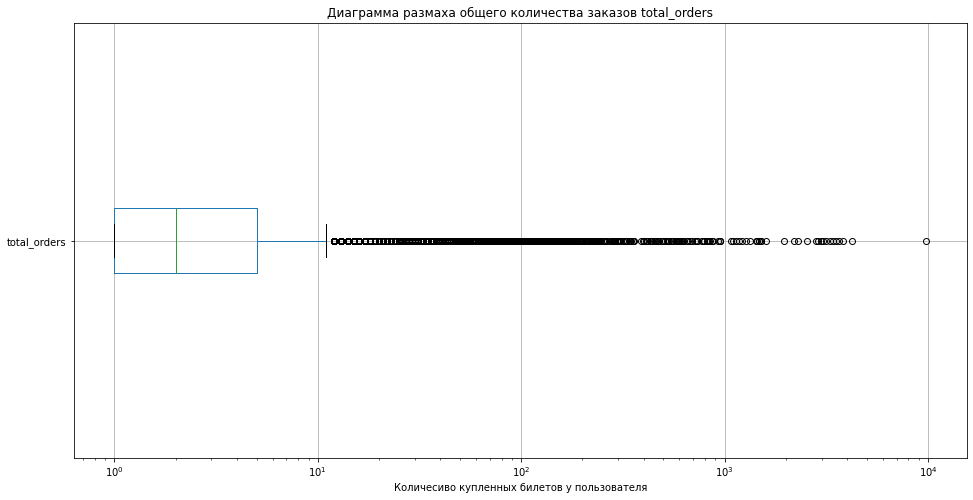

In [74]:
def order_id_count_bp_make(title):

    order_id_count_bp = pdf.boxplot(
        column='total_orders', 
        figsize=(16,8), 
        vert=False)

    order_id_count_bp.set_xscale('log')

    order_id_count_bp.set_title(title)
    order_id_count_bp.set_xlabel('Количесиво купленных билетов у пользователя')

    return order_id_count_bp

order_id_count_bp_make('Диаграмма размаха общего количества заказов total_orders')

<Axes: title={'center': 'Диаграмма размаха среднего числа билетов в заказе avg_tickets_count'}, xlabel='Среднее количество билетов в заказе'>

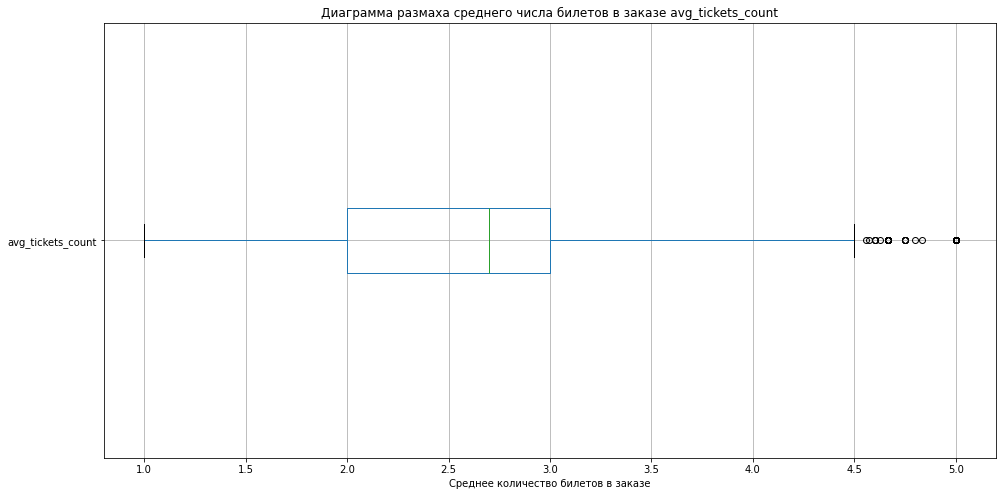

In [75]:
def tickets_count_mean_bp_make(title):
    
    tickets_count_mean_bp = pdf.boxplot(
        column='avg_tickets_count', 
        figsize=(16,8), 
        vert=False)

    tickets_count_mean_bp.set_title(title)
    tickets_count_mean_bp.set_xlabel('Среднее количество билетов в заказе')

    return tickets_count_mean_bp

tickets_count_mean_bp_make('Диаграмма размаха среднего числа билетов в заказе avg_tickets_count')

<Axes: title={'center': 'Диаграмма размаха среднего числа дней между заказами avg_days_since_prev'}, xlabel='Среднее число дней между заказами'>

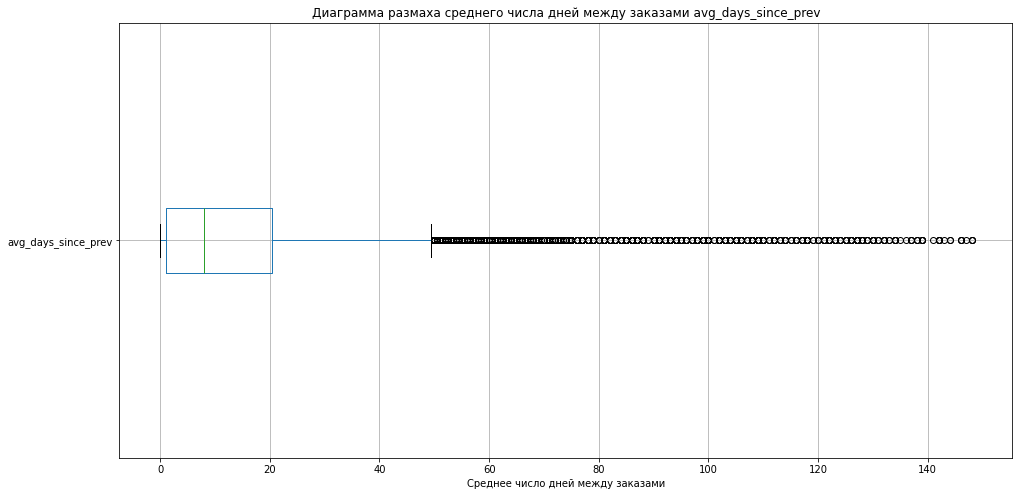

In [76]:
def days_since_prev_mean_bp_make(title):

    days_since_prev_mean_bp = pdf.boxplot(
        column='avg_days_since_prev', 
        figsize=(16,8), 
        vert=False)

    days_since_prev_mean_bp.set_title(title)
    days_since_prev_mean_bp.set_xlabel('Среднее число дней между заказами')

    return days_since_prev_mean_bp

days_since_prev_mean_bp_make('Диаграмма размаха среднего числа дней между заказами avg_days_since_prev')

In [77]:
percentiles=[.25, .5, .75, .8, .85, .9, .95, .99, .999]
pdf.describe(percentiles)

,first_order_dt,last_order_dt,total_orders,avg_revenue_rub,avg_tickets_count,avg_days_since_prev
count,21551,21551,21551.000000,21551.000000,21551.000000,13393.0
mean,2024-08-10 08:11:02.836991232,2024-09-18 12:51:04.952902400,12.881212,546.287486,2.698722,15.850012
min,2024-06-01 00:00:00,2024-06-01 00:00:00,1.000000,0.070000,1.000000,0.0
25%,2024-06-25 00:00:00,2024-08-25 00:00:00,1.000000,218.240000,2.000000,1.0
50%,2024-08-09 00:00:00,2024-10-03 00:00:00,2.000000,471.480000,2.700000,8.0
75%,2024-09-23 00:00:00,2024-10-22 00:00:00,5.000000,764.479000,3.000000,20.428571
80%,2024-10-01 00:00:00,2024-10-25 00:00:00,7.000000,852.250000,3.333333,25.25
85%,2024-10-08 12:00:00,2024-10-27 00:00:00,9.000000,967.312143,3.500000,31.75
90%,2024-10-16 00:00:00,2024-10-29 00:00:00,15.000000,1104.164286,4.000000,41.466667
95%,2024-10-24 00:00:00,2024-10-31 00:00:00,31.000000,1364.050000,4.000000,61.2


<b>
    <p>Видно, что в колонках total_orders присутствует большое количество аномалий. Вряд ли кто то сделал за пол года десятки тысяч заказов и даже сотню. Поэтому отсучем аномалии по перцентилю 99, которое сотавляет 27 заказов</p>
    <p>В колонке avg_tickets_count их количество незначительно, убирать их не будем</p>
    <p>В колонке avg_days_since_prev их количество не превышает значения 150, что меньше полугода и выглядит корректно</p>
</b>

In [78]:
total_orders_percentile_99 = pdf['total_orders'].quantile(0.95)

print(
    '99 перцентиль количества заказов:',
     total_orders_percentile_99
)

99 перцентиль количества заказов: 31.0


In [79]:
number_total_orders_exeeds_percentile_99 = \
    pdf[pdf['total_orders'] > total_orders_percentile_99]['total_orders'].count()

print(
    'Количество пользователей, у которых суммарное количество заказов превышает 99 перцентиль:', 
    number_total_orders_exeeds_percentile_99
)

Количество пользователей, у которых суммарное количество заказов превышает 99 перцентиль: 1062


In [80]:
pdf = pdf[pdf['total_orders'] < number_total_orders_exeeds_percentile_99].copy()

<Axes: title={'center': 'Диаграмма размаха общего количества заказов total_orders после удаления'}, xlabel='Количесиво купленных билетов у пользователя'>

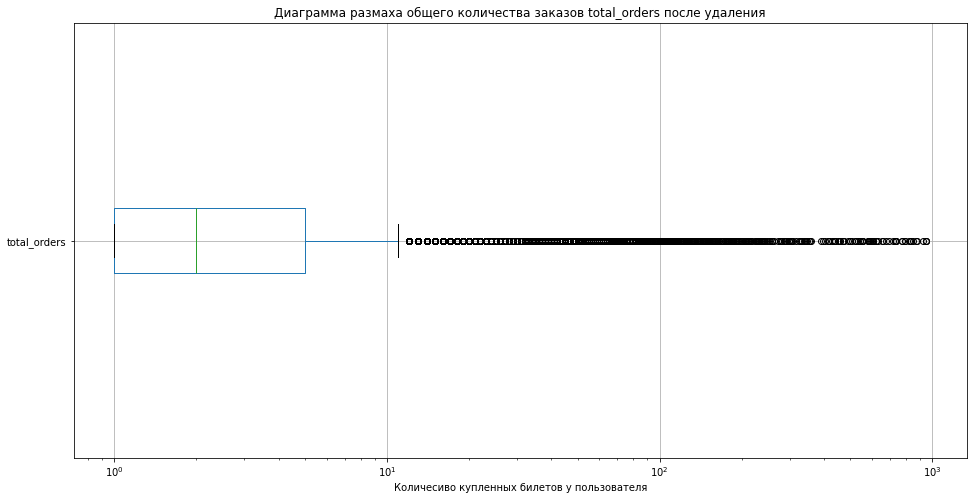

In [81]:
order_id_count_bp_make('Диаграмма размаха общего количества заказов total_orders после удаления')

<b>Выведем среднее значение выручки после фильтрации строк</b>

In [82]:
percentiles=[.25, .5, .75, .8, .85, .9, .95, .99, .999]
pdf.describe(percentiles)

,first_order_dt,last_order_dt,total_orders,avg_revenue_rub,avg_tickets_count,avg_days_since_prev
count,21521,21521,21521.000000,21521.000000,21521.000000,13363.0
mean,2024-08-10 10:32:10.728125952,2024-09-18 11:25:50.504158720,9.445937,546.323058,2.698736,15.885423
min,2024-06-01 00:00:00,2024-06-01 00:00:00,1.000000,0.070000,1.000000,0.0
25%,2024-06-25 00:00:00,2024-08-25 00:00:00,1.000000,218.025000,2.000000,1.0
50%,2024-08-09 00:00:00,2024-10-03 00:00:00,2.000000,471.006667,2.700000,8.0
75%,2024-09-23 00:00:00,2024-10-22 00:00:00,5.000000,765.074286,3.000000,20.5
80%,2024-10-01 00:00:00,2024-10-25 00:00:00,7.000000,852.717143,3.333333,25.25
85%,2024-10-09 00:00:00,2024-10-27 00:00:00,9.000000,967.630000,3.500000,32.0
90%,2024-10-16 00:00:00,2024-10-29 00:00:00,14.000000,1104.980000,4.000000,41.5
95%,2024-10-24 00:00:00,2024-10-31 00:00:00,30.000000,1364.050000,4.000000,61.5


<b>
    <p>Получаем, что аномальные значения обнаружены в колонке total_orders. Количество таких значений превышающих перцентиль 99 сотсавило 1062. Все из них удалили.</p>
    <p>По билетам значение avg_tickets_count не превышает 5. Аномалий нет.</p>
    <p>По среднему числу дней максимальное значение не превышает 150, что меньше полугода. Аномалий нет.</p>
    <p>После отбрасывания, среднее значение выручки изменилось с 21551 на 21521</p>
</b>

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ пользовательских профилей <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-block alert-danger">
 
<b>Нужно доработать ❌:</b> Любой раздел необходимо завершать резюмирующими выводами.

</div>   

<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 

* Чтобы сильно не растягивать код на множество ячеек, схожие по целям и подходам шаги лучше выполнять одной ячейкой. Например, можно было бы объединить первичный подсчет статистик.


* Для полноты картины было бы не лишним отобразить `describe`. В параметрах можно расширить перечень перцентилей: `percentiles=[.25, .5, .75 ...]`.


* Решение по выбросам обосновано слабо, присутствие выбросов на графике - это еще не повод, здесь нужно подключать логику и здравый смысл. Действительно ли количество дней требовало фильтрации? У нас данные за полгода, разве 148 дней промежутка это аномально?
    
    
* Было бы не лишним также проверить, насколько изменились показатели возвращаемости и средней выручки после фильтрации.

    
* Если выводим какие-то значения на печать, то стоит их не только подписывать, но и форматировать. Для красоты и удобства дробные значения лучше округлять до знаков, которые могут представлять для нас интерес.  
    
    
* Напоминаю про моменты, которые упоминала ранее: длина строки кода.

</div>


<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера 2 ✅<a class="tocSkip"></h3>

---

### 4. Исследовательский анализ данных

Следующий этап — исследование признаков, влияющих на возврат пользователей, то есть на совершение повторного заказа. Для этого используйте профили пользователей.



#### 4.1. Исследование признаков первого заказа и их связи с возвращением на платформу

Исследуйте признаки, описывающие первый заказ пользователя, и выясните, влияют ли они на вероятность возвращения пользователя.

---

**Задача 4.1.1.** Изучите распределение пользователей по признакам.

- Сгруппируйте пользователей:
    - по типу их первого мероприятия;
    - по типу устройства, с которого совершена первая покупка;
    - по региону проведения мероприятия из первого заказа;
    - по билетному оператору, продавшему билеты на первый заказ.
- Подсчитайте общее количество пользователей в каждом сегменте и их долю в разрезе каждого признака. Сегмент — это группа пользователей, объединённых определённым признаком, то есть объединённые принадлежностью к категории. Например, все клиенты, сделавшие первый заказ с мобильного телефона, — это сегмент.
- Ответьте на вопрос: равномерно ли распределены пользователи по сегментам или есть выраженные «точки входа» — сегменты с наибольшим числом пользователей?

---


In [83]:
pdf.columns

Index(['user_id', 'first_order_dt', 'last_order_dt', 'first_device',
       'first_region_name', 'first_service_name', 'first_event_type',
       'total_orders', 'avg_revenue_rub', 'avg_tickets_count',
       'avg_days_since_prev', 'is_two', 'is_five'],
      dtype='object')

In [84]:
total_users_count = pdf['user_id'].count()

def group_by_sign_user_id_count(sign_name):
    df = pdf.groupby(sign_name)[['user_id']].count().reset_index().sort_values('user_id', ascending=False)
    
    df['share'] = df['user_id'] / total_users_count

    return df

def draw_bar_user_id(df, xlabel, title):
    df.plot.bar(
        x=list(df.columns)[0],
        y='user_id',
        figsize=(20,12),
        title=title
    )
    plt.xlabel(xlabel)
    plt.ylabel('Количество пользователей')
    plt.grid()
    plt.show()

In [85]:
device_type_canonical_df = group_by_sign_user_id_count('first_device')
device_type_canonical_df

/tmp/ipykernel_294/366859731.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pdf.groupby(sign_name)[['user_id']].count().reset_index().sort_values('user_id', ascending=False)


,first_device,user_id,share
1,mobile,17843,0.829097
0,desktop,3678,0.170903


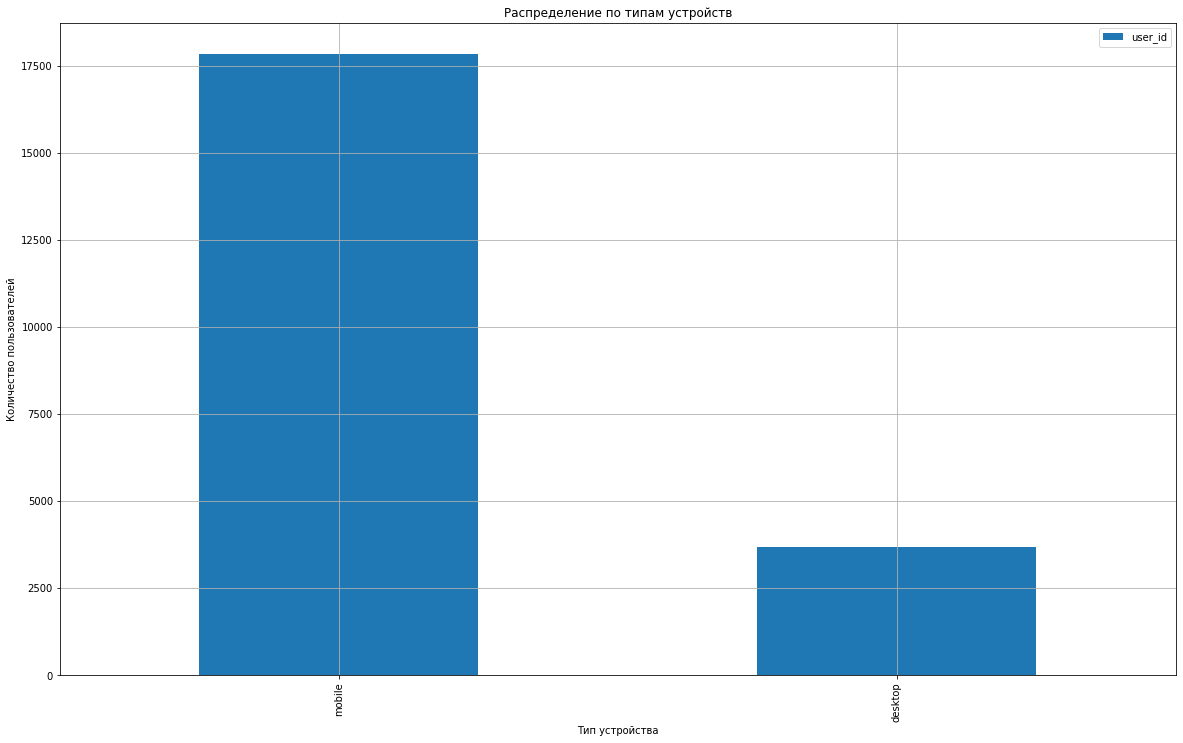

In [86]:
draw_bar_user_id(device_type_canonical_df, 'Тип устройства', 'Распределение по типам устройств')

In [87]:
event_type_main_df = group_by_sign_user_id_count('first_event_type')
event_type_main_df

/tmp/ipykernel_294/366859731.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pdf.groupby(sign_name)[['user_id']].count().reset_index().sort_values('user_id', ascending=False)


,first_event_type,user_id,share
2,концерты,9650,0.448399
1,другое,5203,0.241764
5,театр,4283,0.199015
4,стендап,1108,0.051485
3,спорт,768,0.035686
0,выставки,415,0.019283
6,ёлки,94,0.004368


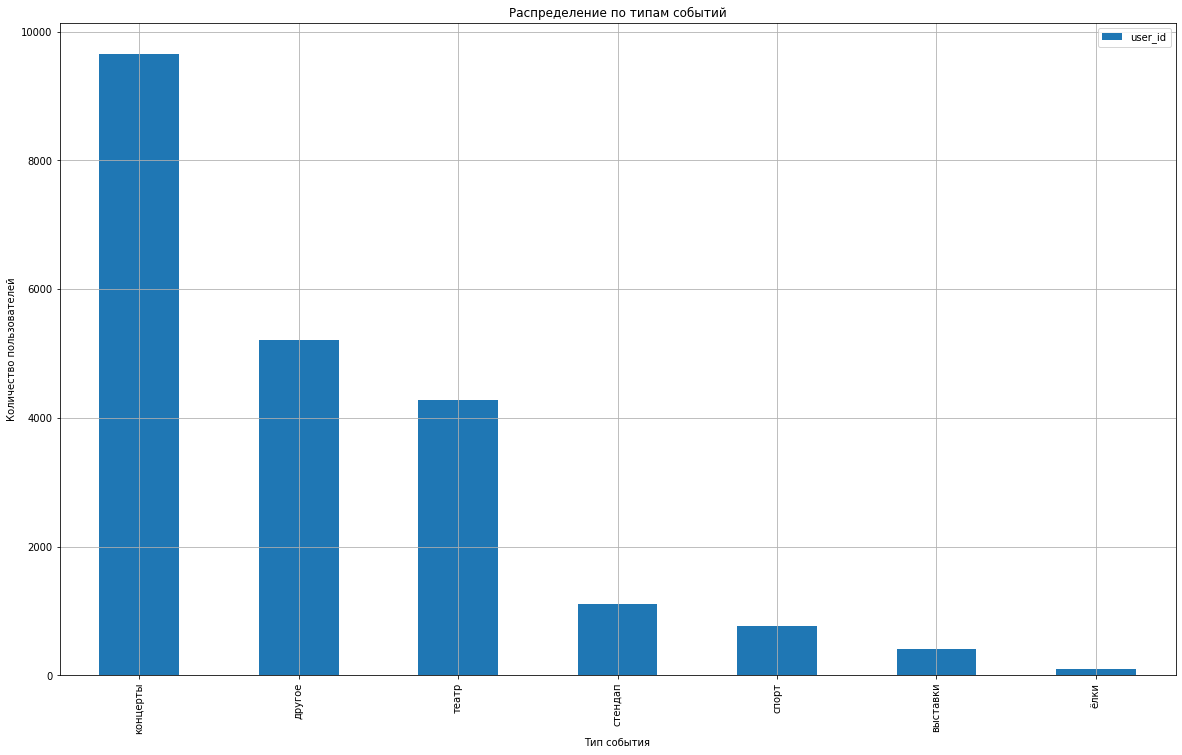

In [88]:
draw_bar_user_id(event_type_main_df, 'Тип события', 'Распределение по типам событий')

In [89]:
region_name_df = group_by_sign_user_id_count('first_region_name')
region_name_df

/tmp/ipykernel_294/366859731.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pdf.groupby(sign_name)[['user_id']].count().reset_index().sort_values('user_id', ascending=False)


,first_region_name,user_id,share
23,Каменевский регион,7002,0.325357
60,Североярская область,3773,0.175317
77,Широковская область,1240,0.057618
45,Озернинский край,669,0.031086
41,Малиновоярский округ,532,0.024720
...,...,...,...
17,Залесский край,2,0.000093
70,Тихогорская область,2,0.000093
5,Верхозёрский край,1,0.000046
66,Сосноводолинская область,1,0.000046


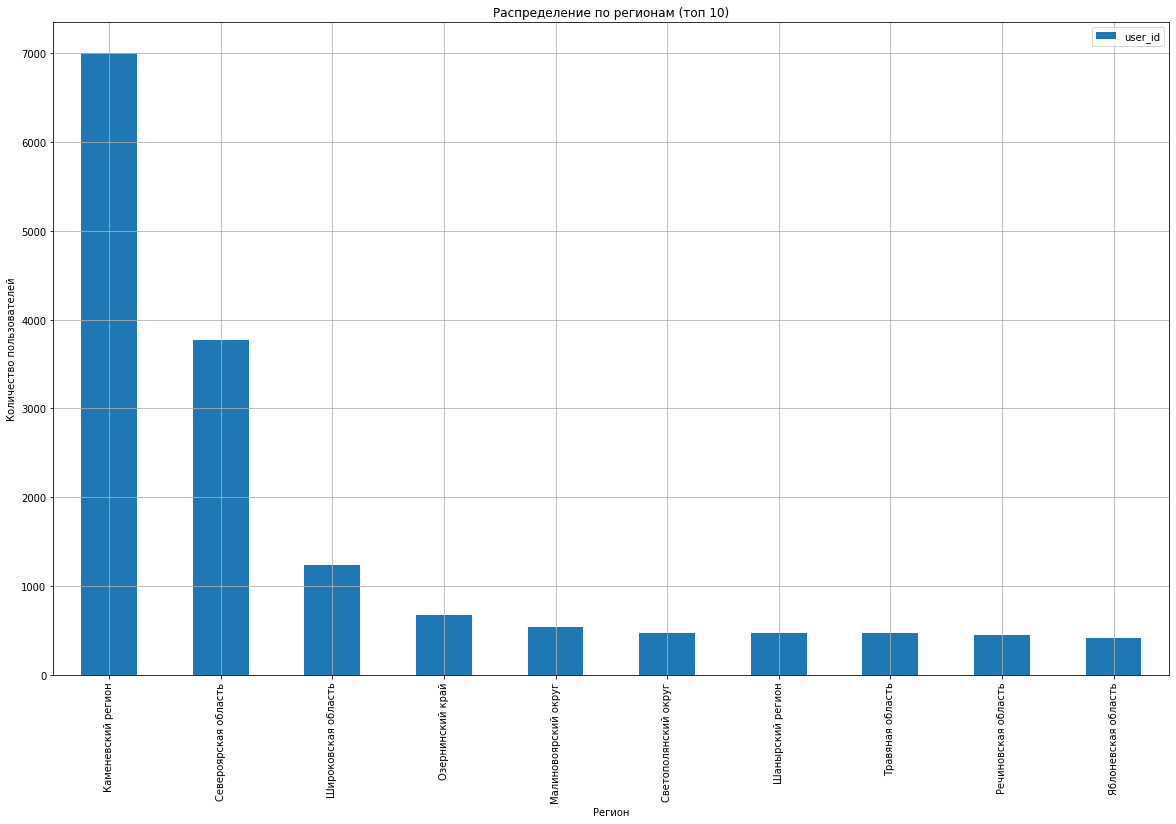

In [90]:
draw_bar_user_id(region_name_df.head(10), 'Регион', 'Распределение по регионам (топ 10)')

In [91]:
service_name_df = group_by_sign_user_id_count('first_service_name')
service_name_df

/tmp/ipykernel_294/366859731.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pdf.groupby(sign_name)[['user_id']].count().reset_index().sort_values('user_id', ascending=False)


,first_service_name,user_id,share
3,Билеты без проблем,4927,0.228939
24,Мой билет,3005,0.139631
21,Лови билет!,2821,0.131081
5,Билеты в руки,2578,0.119790
25,Облачко,2206,0.102505
8,Весь в билетах,1286,0.059756
22,Лучшие билеты,1183,0.054970
26,Прачечная,587,0.027276
19,Край билетов,465,0.021607
13,Дом культуры,347,0.016124


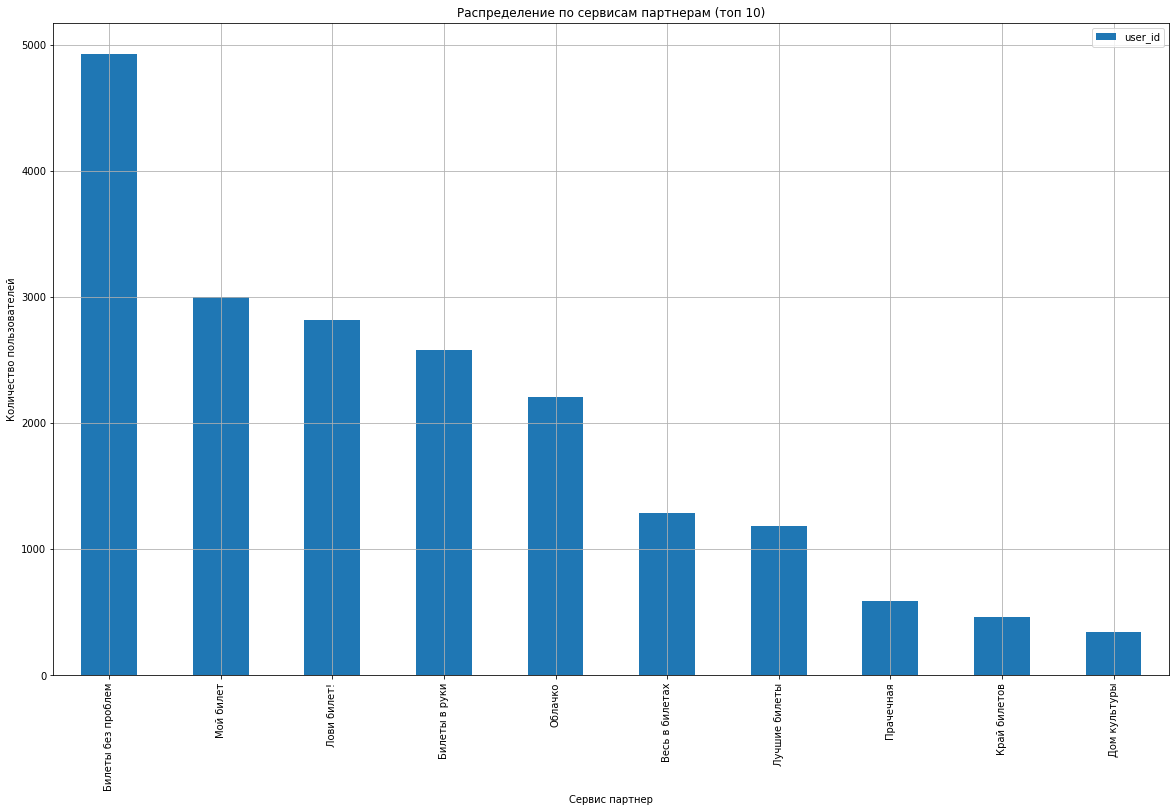

In [92]:
draw_bar_user_id(service_name_df.head(10), 'Сервис партнер', 'Распределение по сервисам партнерам (топ 10)')

<b>
    <p>Среди полученных данных можно заметить, что не наблюдается равномерное распределение</p>
    <p>Имеются явные точки входа пользователей. Не говорит о явной точке входа, скорей всего все остальные заказы далаются так же с мобильного телефона. Для проверки гипотезы нужно построить распределение по всем заказам, не только по первым.</p>
    <p>Большая часть билетов приобретается на концерты, театры и другое. Также не говорит о точках входа, это субъективные предпочтения. Либо говорит, но в принципе в большинстве своем на афише представлены концерты. Можно проверить посчитав сколько ивентов в каждой категории существует.</p>
    <p>Большинство заказов делается из Каменевского региона.</p>
    <p>Большинство заказов делается с платформ "Билеты без проблем", "Мой билет", "Лови билет", "Билеты в руки", "Облако". Это является основными точками входа, через котоыре приобретается большая часть билетов, более 70%</p>
</b>

---

**Задача 4.1.2.** Проанализируйте возвраты пользователей:

- Для каждого сегмента вычислите долю пользователей, совершивших два и более заказа.
- Визуализируйте результат подходящим графиком. Если сегментов слишком много, то поместите на график только 10 сегментов с наибольшим количеством пользователей. Такое возможно с сегментами по региону и по билетному оператору.
- Ответьте на вопросы:
    - Какие сегменты пользователей чаще возвращаются на Яндекс Афишу?
    - Наблюдаются ли успешные «точки входа» — такие сегменты, в которых пользователи чаще совершают повторный заказ, чем в среднем по выборке?

При интерпретации результатов учитывайте размер сегментов: если в сегменте мало пользователей (например, десятки), то доли могут быть нестабильными и недостоверными, то есть показывать широкую вариацию значений.

---


In [93]:
def group_by_sign_is_two(sign_name):

    df = pdf.groupby(sign_name)[['is_two']].sum().reset_index()
    
    df['share'] = df['is_two'] / group_by_sign_user_id_count(sign_name)['user_id']

    return df.sort_values('share', ascending=False)

def draw_bar_is_two(df, xlabel, title):
    df.plot.bar(
        x=list(df.columns)[0],
        y='share',
        figsize=(20,12),
        title=title
    )
    plt.xlabel(xlabel)
    plt.ylabel('Доля пользователей с двумя иболее заказами')
    plt.grid()
    plt.show()
    
def draw_scatter_is_two(df, xlabel, title, column_name):
    counts = list(df['is_two'])
    sahres = list(df['share'])
    labels = list(df[column_name])
    
    plt.figure(figsize=(18, 16))

    for i in range(len(counts)):
        plt.scatter(counts[i], sahres[i], label=labels[i])

    # Подписи осей
    plt.xlabel(xlabel)
    plt.ylabel('Доля пользователей с двумя иболее заказами')

    plt.legend(title='Точки')

    plt.grid(True, linestyle='--', alpha=0.7)

    plt.show()

In [94]:
device_type_canonical_df = group_by_sign_is_two('first_device')
device_type_canonical_df

/tmp/ipykernel_294/415979568.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pdf.groupby(sign_name)[['is_two']].sum().reset_index()
/tmp/ipykernel_294/366859731.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pdf.groupby(sign_name)[['user_id']].count().reset_index().sort_values('user_id', ascending=False)


,first_device,is_two,share
0,desktop,2353,0.639750
1,mobile,10888,0.610211


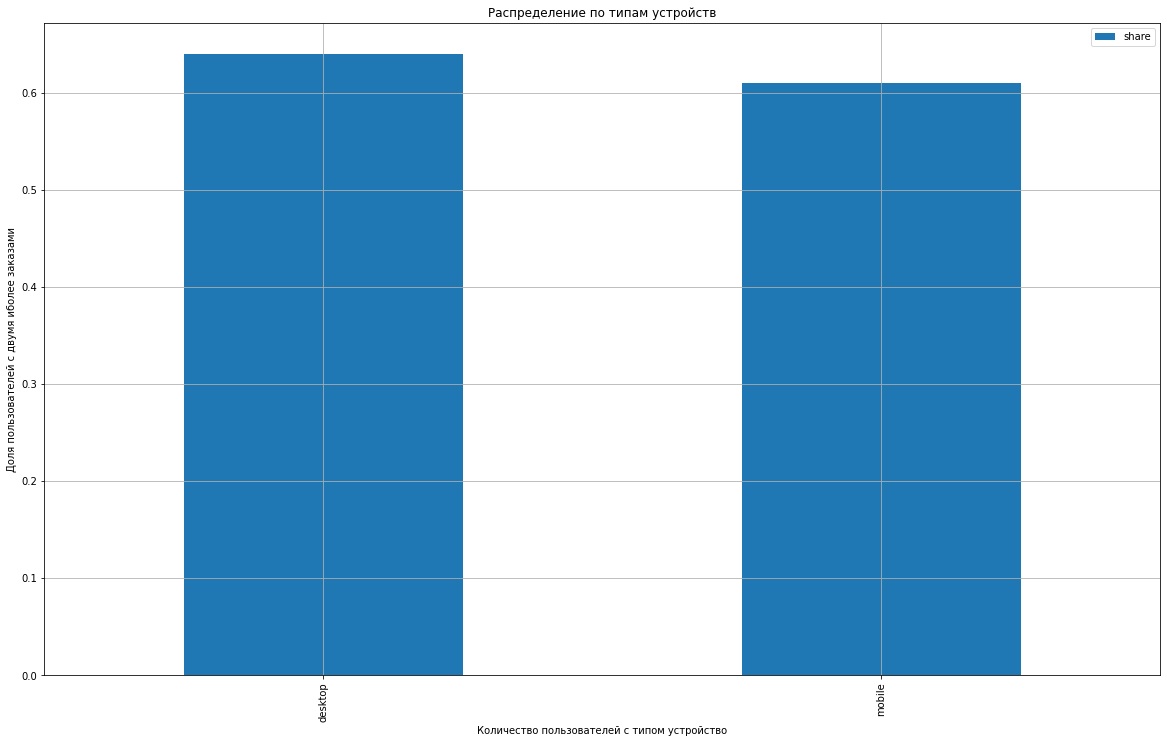

In [95]:
draw_bar_is_two(device_type_canonical_df, 'Количество пользователей с типом устройство', 'Распределение по типам устройств')

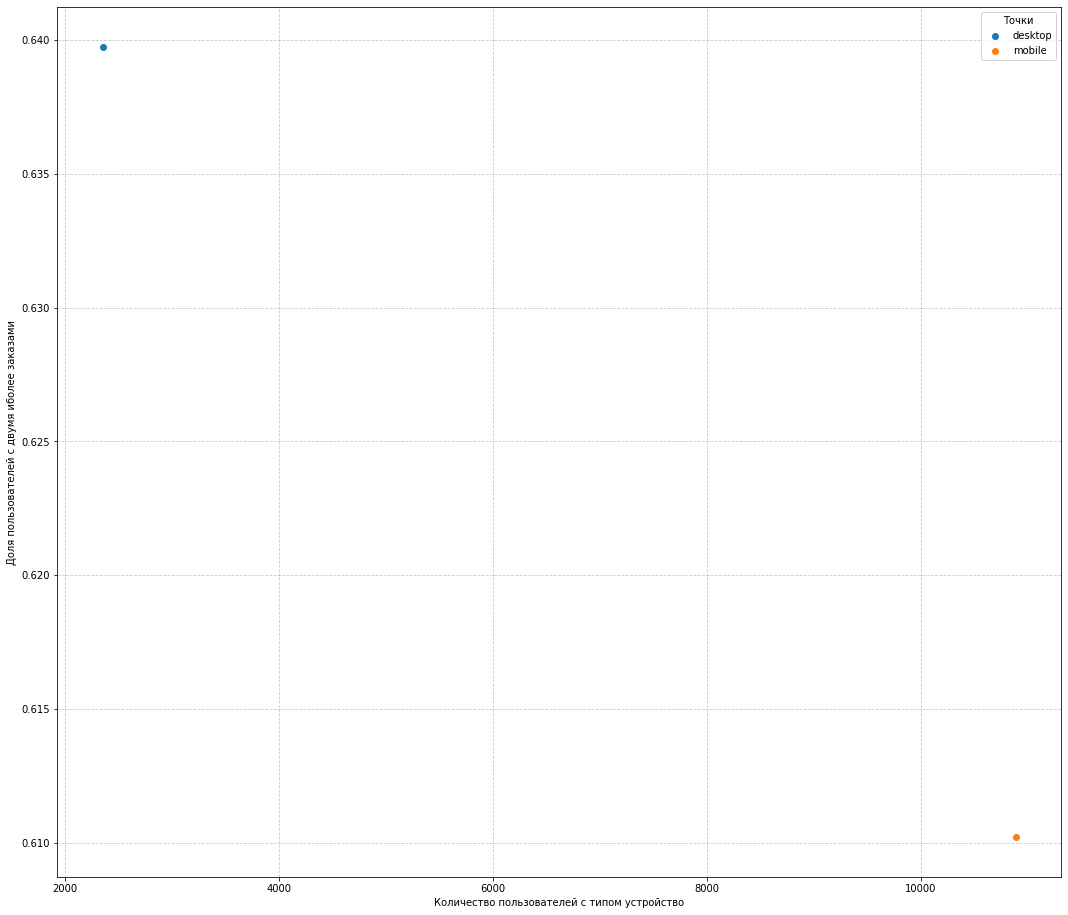

In [96]:
draw_scatter_is_two(device_type_canonical_df, 'Количество пользователей с типом устройство', 'Распределение по типам устройств', 'first_device')

In [97]:
event_type_main_df = group_by_sign_is_two('first_event_type')
event_type_main_df

/tmp/ipykernel_294/415979568.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pdf.groupby(sign_name)[['is_two']].sum().reset_index()
/tmp/ipykernel_294/366859731.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pdf.groupby(sign_name)[['user_id']].count().reset_index().sort_values('user_id', ascending=False)


,first_event_type,is_two,share
0,выставки,266,0.640964
5,театр,2736,0.638805
2,концерты,5968,0.618446
4,стендап,677,0.611011
1,другое,3120,0.599654
3,спорт,424,0.552083
6,ёлки,50,0.531915


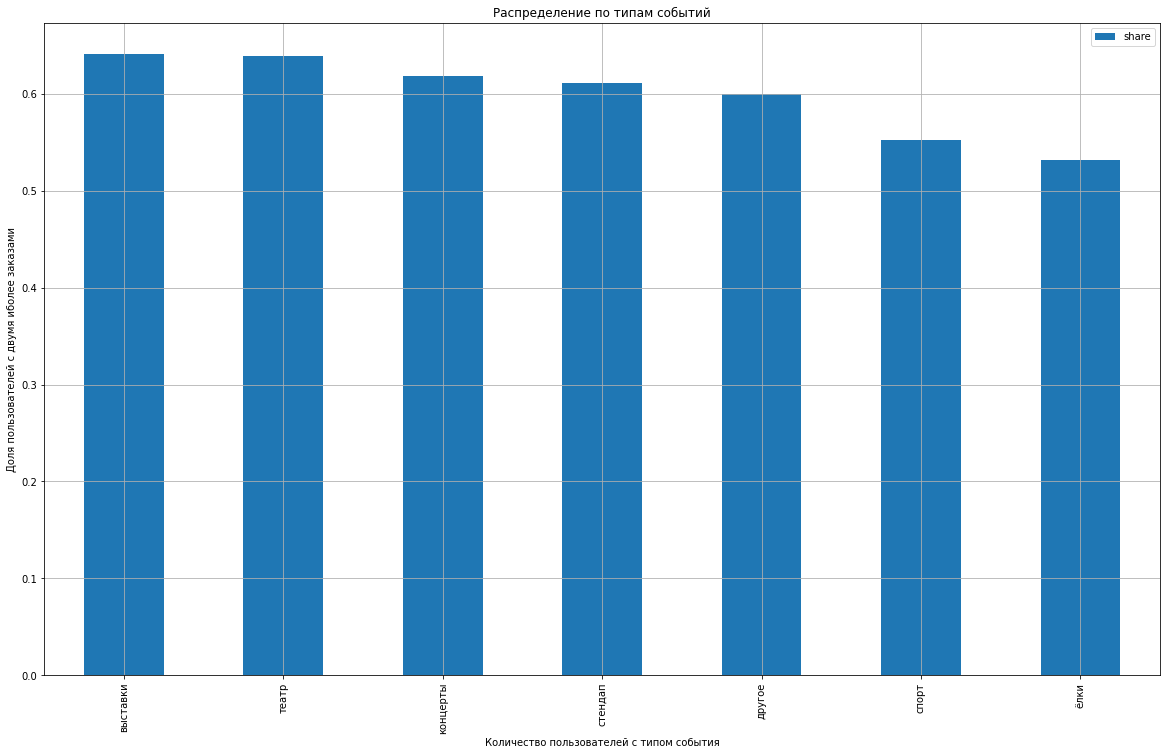

In [98]:
draw_bar_is_two(event_type_main_df, 'Количество пользователей с типом события', 'Распределение по типам событий')

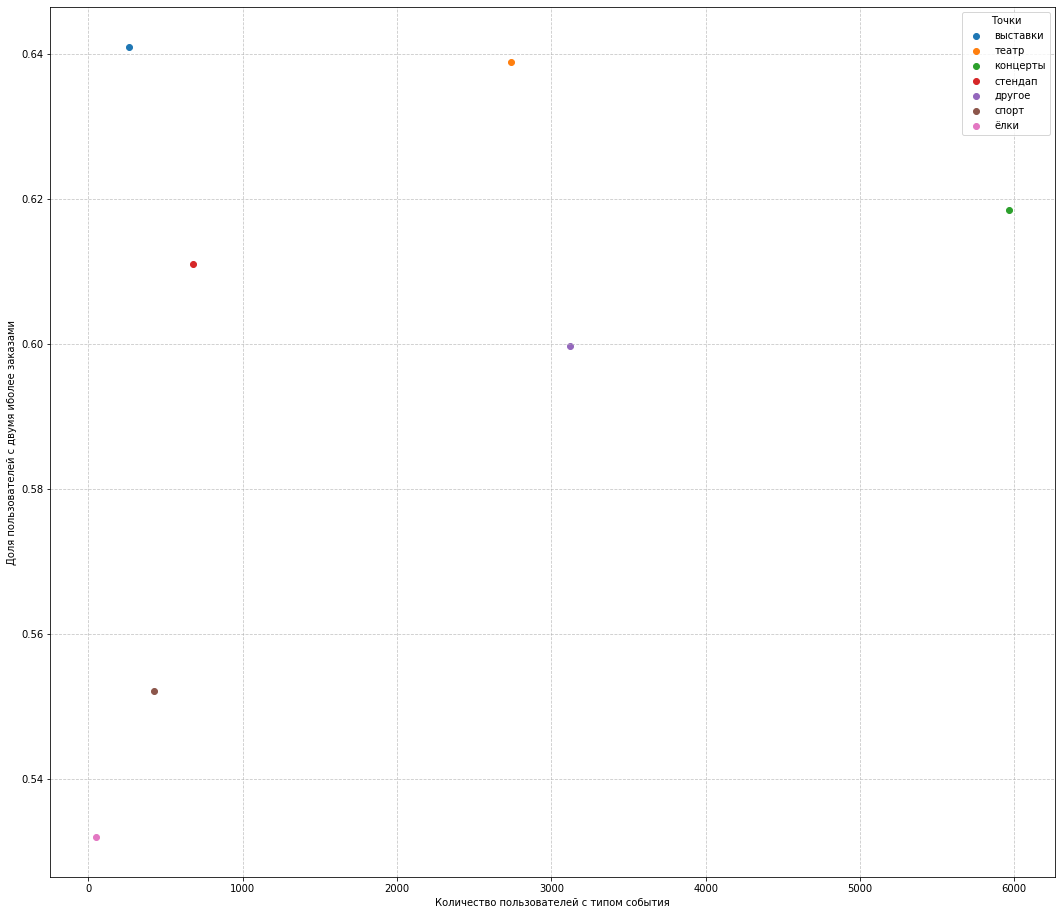

In [99]:
draw_scatter_is_two(event_type_main_df, 'Количество пользователей с типом события', 'Распределение по типам событий', 'first_event_type')

In [100]:
region_name_df = group_by_sign_is_two('first_region_name')
region_name_df = region_name_df[region_name_df['is_two'] > region_name_df['is_two'].quantile(0.25)]
region_name_df

/tmp/ipykernel_294/415979568.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pdf.groupby(sign_name)[['is_two']].sum().reset_index()
/tmp/ipykernel_294/366859731.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pdf.groupby(sign_name)[['user_id']].count().reset_index().sort_values('user_id', ascending=False)


,first_region_name,is_two,share
46,Озернопольская область,25,0.892857
51,Радужнопольский край,19,0.791667
12,Горноземский регион,20,0.714286
36,Лесостепной край,44,0.709677
76,Шанырский регион,322,0.693966
11,Горицветская область,177,0.686047
79,Ягодиновская область,45,0.681818
59,Североозёрский округ,20,0.666667
57,Светополянский округ,309,0.663090
2,Берёзовская область,72,0.660550


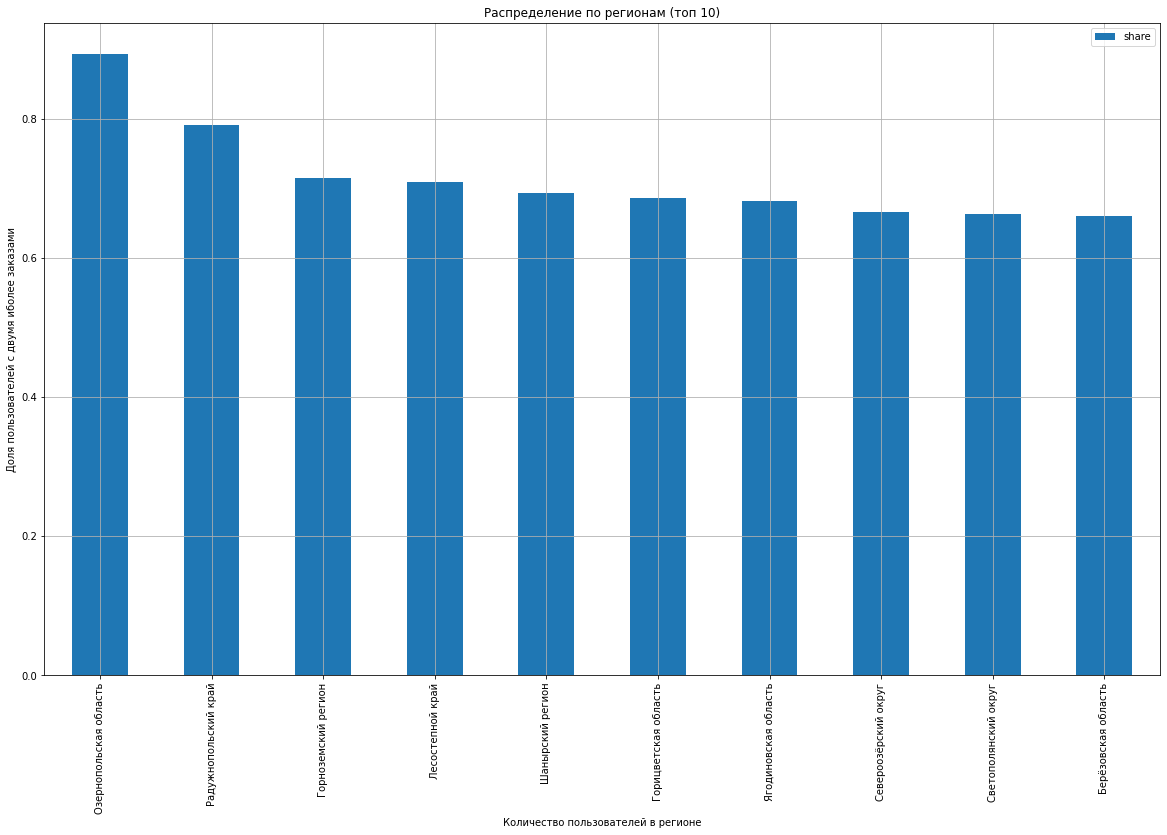

In [101]:
draw_bar_is_two(region_name_df.head(10), 'Количество пользователей в регионе', 'Распределение по регионам (топ 10)')

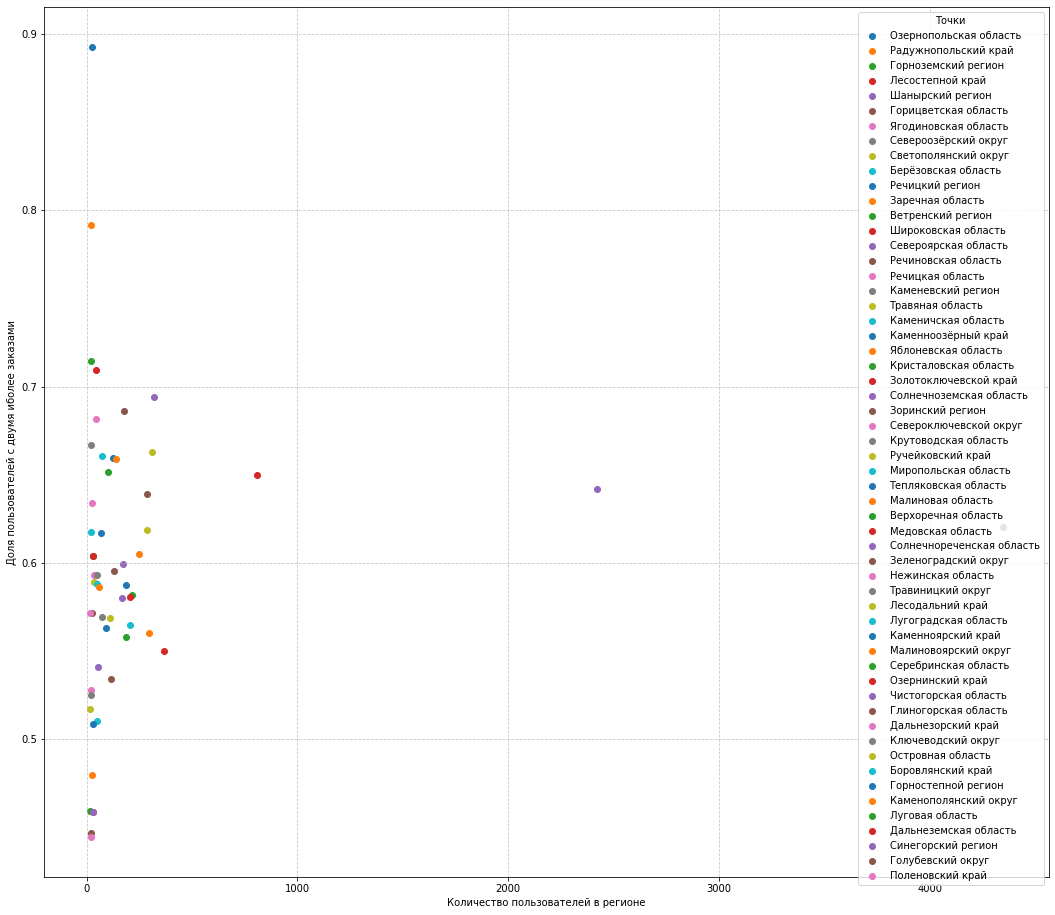

In [102]:
draw_scatter_is_two(region_name_df, 'Количество пользователей в регионе', 'Распределение по типам событий', 'first_region_name')

In [103]:
service_name_df = group_by_sign_is_two('first_service_name')
service_name_df = service_name_df[service_name_df['is_two'] > service_name_df['is_two'].quantile(0.25)]
service_name_df

/tmp/ipykernel_294/415979568.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pdf.groupby(sign_name)[['is_two']].sum().reset_index()
/tmp/ipykernel_294/366859731.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pdf.groupby(sign_name)[['user_id']].count().reset_index().sort_values('user_id', ascending=False)


,first_service_name,is_two,share
7,Быстрый кассир,52,0.852459
28,Реестр,31,0.837838
0,Crazy ticket!,32,0.695652
33,Цвет и билет,16,0.666667
1,Show_ticket,112,0.666667
9,Восьмёрка,55,0.662651
29,Росбилет,27,0.658537
19,Край билетов,303,0.651613
13,Дом культуры,223,0.642651
23,Мир касс,135,0.639810


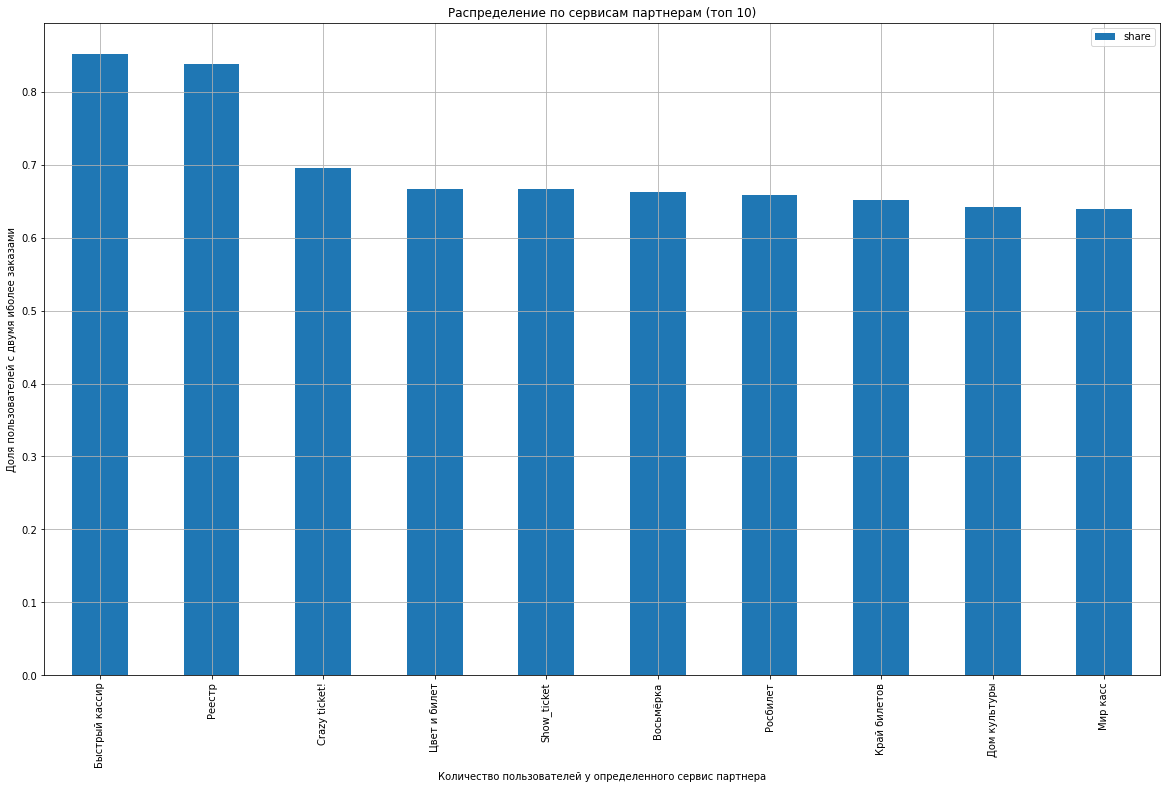

In [104]:
draw_bar_is_two(service_name_df.head(10), 'Количество пользователей у определенного сервис партнера', 'Распределение по сервисам партнерам (топ 10)')

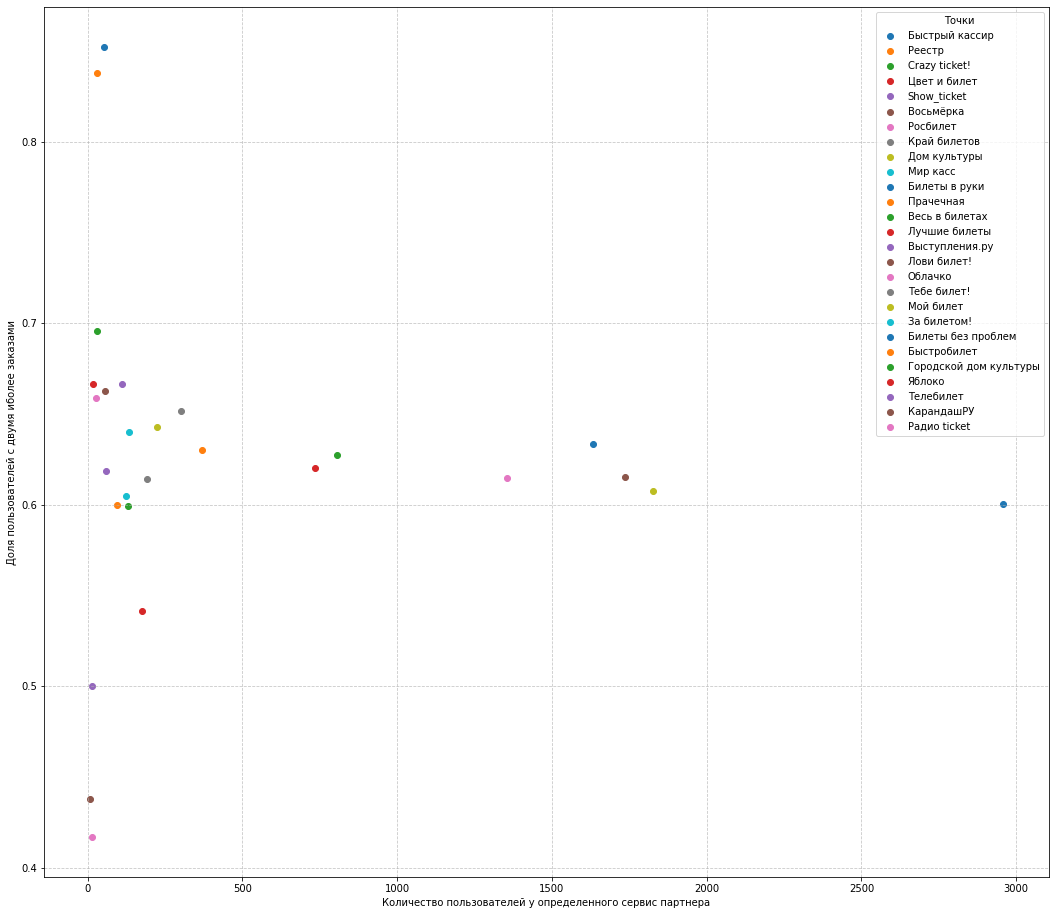

In [105]:
draw_scatter_is_two(service_name_df, 'Количество пользователей у определенного сервис партнера', 'Распределение по типам событий', 'first_service_name')

<b>
    <p>По всему датасету доля пользователей которая возвращается составляет около 0.62. Чаще всего, больше, чем в среднем возвращаются сегменты desktop, выставки, театр, Шантырский район, Святополянский округ, Край билетов, Дом культуры</p>
    <p>В целом по каждому сегменту доля пользователей совершивших 2 и более заказов отличается незначительно.</p>
</b>

---

**Задача 4.1.3.** Опираясь на выводы из задач выше, проверьте продуктовые гипотезы:

- **Гипотеза 1.** Тип мероприятия влияет на вероятность возврата на Яндекс Афишу: пользователи, которые совершили первый заказ на спортивные мероприятия, совершают повторный заказ чаще, чем пользователи, оформившие свой первый заказ на концерты.
- **Гипотеза 2.** В регионах, где больше всего пользователей посещают мероприятия, выше доля повторных заказов, чем в менее активных регионах.

---

<b>Гипотеза 1: По полученным данным можно заметить, что гипотеза не подтверждается. Доля возвратов пользователей, у которых первый заказ был по спортивному мероприятию меньше чем доля тех, у кого это был концерт. 0.533784 против 0.598422 соответственно</b>

<b>Гипотеза 2: Не подтверждается. По построенной диаграмме рассеяния видно, что значения концентрируются в районе 0.65 и далее при величении количества остается постоянным. Можно будет применить линейную регрессию посчитав СКО</b>

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ сегментов пользователей <a class="tocSkip"></h4>
    
<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> Здорово, что функционализируешь выполнение повторяющихся действий! Это облегчает код и уменьшает влияние человеческого фактора.
 
</div>

<div style="border-radius: 10px" class="alert alert-block alert-danger">

<b>Нужно доработать ❌:</b> Выводы по второй гипотезе пока обоснованы не совсем корректно. Важно учитывать размерность групп при сравнении долей! В менее популярных группах 1 дополнительный пользователь имеет больший вес, а потому показатель возвращаемости у таких категорий больше подвержен колебаниям, менее стабилен. Например, если бы у нас в группу с остальными регионами попало только два региона с одним пользователем, в одном вернулось 100%, в другом 0%, среднее 50%, показательно ли это? Чтобы сделать более осознанный вывод, можно, к примеру, построить скаттерплот с отображением размера региона и возвращаемости в нем, тогда будет видно всю картину в данных и можно будет сказать, что судя по относительно крупным регионам, в стабильности которых мы более менее уверены, такой зависимости не наблюдается.
    
Но вообще, чтобы наверняка убедиться в том, что возвращаемость в непопулярных группах ниже, и это не случайное колебание, следует провести статистический тест, оценить значимость различий. Это будет изучаться в дальнейшем на курсе, там есть довольно много нюансов.   

</div>    

<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 


* В случае вывода неполного набора сегментов стоит указать, какой процент от выборки они составляют, чтобы было понимание, насколько большая часть данных осталась за пределами нашего обзора.


* Также было бы неплохо добавить на графики линию общей возвращаемости по выборке, чтобы было удобно сравнивать, какие сегменты и насколько отличаются от общего показателя по выборке. Это можно сделать с помощью `plt.axhline` (горизонтальная) или `plt.axvline`(вертикальная), потребуется также добавить легенду, чтобы обозначить, что есть что. Но обращаю внимание, что ввиду различия размерности групп это должна быть возвращаемость в выборке, а не среднее между возвращаемостями по группам.
    
 
* В выводах по первым двум частям было бы неплохо также попробовать предположить, почему мы могли получить то или иное распределение по сегментам и определенный уровень возвращаемости, почему показатели оказались именно такими. Это может быть полезно в плане развития стратегий по привлечению новых пользователей.


* Каков итоговый вывод по анализу сегментов? Какие инсайты мы получили?

    
</div>

<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера 2 ✅<a class="tocSkip"></h3>

---

#### 4.2. Исследование поведения пользователей через показатели выручки и состава заказа

Изучите количественные характеристики заказов пользователей, чтобы узнать среднюю выручку сервиса с заказа и количество билетов, которое пользователи обычно покупают.

Эти метрики важны не только для оценки выручки, но и для оценки вовлечённости пользователей. Возможно, пользователи с более крупными и дорогими заказами более заинтересованы в сервисе и поэтому чаще возвращаются.

---

**Задача 4.2.1.** Проследите связь между средней выручкой сервиса с заказа и повторными заказами.

- Постройте сравнительные гистограммы распределения средней выручки с билета (`avg_revenue_rub`):
    - для пользователей, совершивших один заказ;
    - для вернувшихся пользователей, совершивших 2 и более заказа.
- Ответьте на вопросы:
    - В каких диапазонах средней выручки концентрируются пользователи из каждой группы?
    - Есть ли различия между группами?

Текст на сером фоне:
    
**Рекомендация:**

1. Используйте одинаковые интервалы (`bins`) и прозрачность (`alpha`), чтобы визуально сопоставить распределения.
2. Задайте параметру `density` значение `True`, чтобы сравнивать форму распределений, даже если число пользователей в группах отличается.

---


In [106]:
avg_ticket_df = pdf.copy()
avg_ticket_df['avg_revenue_rub_per_ticket'] = avg_ticket_df['avg_revenue_rub'] / avg_ticket_df['avg_tickets_count']
avg_ticket_df.head(10)

,user_id,first_order_dt,last_order_dt,first_device,first_region_name,first_service_name,first_event_type,total_orders,avg_revenue_rub,avg_tickets_count,avg_days_since_prev,is_two,is_five,avg_revenue_rub_per_ticket
0,0002849b70a3ce2,2024-08-20,2024-08-20,mobile,Каменевский регион,Край билетов,театр,1,1521.940000,4.000000,<NA>,False,False,380.485000
1,0005ca5e93f2cf4,2024-07-23,2024-10-06,mobile,Каменевский регион,Мой билет,выставки,2,774.010000,3.000000,75.0,True,False,258.003333
2,000898990054619,2024-07-13,2024-10-23,mobile,Североярская область,Лови билет!,другое,3,767.213333,2.666667,51.0,True,False,287.705000
3,00096d1f542ab2b,2024-08-15,2024-08-15,desktop,Каменевский регион,Край билетов,театр,1,917.830000,4.000000,<NA>,False,False,229.457500
4,000a55a418c128c,2024-09-29,2024-10-15,mobile,Поленовский край,Лучшие билеты,театр,2,61.310000,1.500000,16.0,True,False,40.873333
5,000cf0659a9f40f,2024-06-20,2024-06-21,mobile,Широковская область,Лови билет!,концерты,13,1175.808462,3.307692,0.083333,True,True,355.476977
6,00147c9209d45d3,2024-06-25,2024-06-25,mobile,Каменевский регион,Облачко,концерты,2,352.945000,1.500000,0.0,True,False,235.296667
7,00199a573901564,2024-06-17,2024-06-17,mobile,Каменевский регион,Билеты без проблем,концерты,1,588.120000,4.000000,<NA>,False,False,147.030000
8,001e7037d013f0f,2024-07-04,2024-09-29,mobile,Златопольский округ,Мой билет,другое,3,326.623333,1.333333,43.5,True,False,244.967500
9,0020c5654c92ec1,2024-07-02,2024-07-02,mobile,Каменевский регион,Билеты без проблем,концерты,2,193.420000,2.000000,0.0,True,False,96.710000


In [107]:
def draw_compare_hist(df, df_condition_left, df_label_left, df_condition_right, df_label_right):

    plt.figure(figsize=(20, 12))
    
    left = df[df_condition_left(df)][['avg_revenue_rub_per_ticket']].copy()
    left['source'] = df_label_left
    
    right = df[df_condition_right(df)][['avg_revenue_rub_per_ticket']].copy()
    right['source'] = df_label_right
    
    combined = pd.concat([left, right], ignore_index=True)
    
    min_value = left['avg_revenue_rub_per_ticket'].min()
    
    if min_value > right['avg_revenue_rub_per_ticket'].min():
        min_value = right['avg_revenue_rub_per_ticket'].min()
    
    max_value = left['avg_revenue_rub_per_ticket'].min()
    
    if max_value < right['avg_revenue_rub_per_ticket'].max():
        max_value = right['avg_revenue_rub_per_ticket'].max()
    
    hist = sns.histplot(
        data=combined,
        x='avg_revenue_rub_per_ticket',
        hue='source',
        stat='density',
        common_norm=False,
        alpha=0.5,
        palette='Set1',
        edgecolor='black',
        bins = range(math.floor(min_value), math.ceil(max_value)+1, 50),
        legend=True,
        kde=True
    )
    
    left_mean = left['avg_revenue_rub_per_ticket'].mean()
    left_median = left['avg_revenue_rub_per_ticket'].median()

    hist.axvline(left_mean, color='blue', linestyle="--", linewidth=2, label="Mean")
    hist.axvline(left_median, color='blue', linestyle=":", linewidth=2, label="Median")

    right_mean = right['avg_revenue_rub_per_ticket'].mean()
    right_median = right['avg_revenue_rub_per_ticket'].median()

    hist.axvline(right_mean, color='red', linestyle="--", linewidth=2, label="Mean")
    hist.axvline(right_median, color='red', linestyle=":", linewidth=2, label="Median")

    plt.xlabel('Средняя выручка')
    plt.ylabel('Доля')
    plt.title('Гистограмма средней выручки')
    plt.grid(axis='y', alpha=0.3)

    plt.show()
    plt.close()

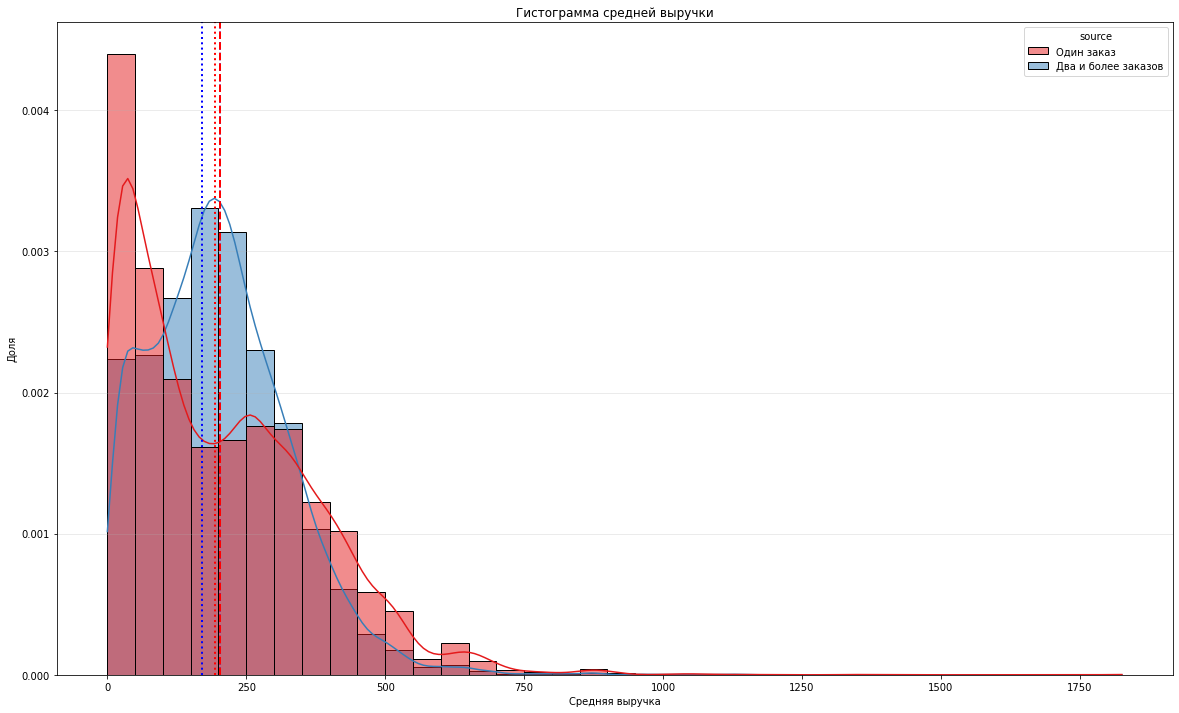

In [108]:
draw_compare_hist(avg_ticket_df, lambda df: df['is_two'] == False, 'Один заказ', lambda df: df['is_two'] == True, 'Два и более заказов')

<b>
    <p>Пользователи группируются в диапазоне средней выручки 200 рублей. Выручка с пользователей совершивших 2 и более заказов незначительно выше.</p>
    <p>Медианные значения различаются. У пользователей совершивших только один заказ наблюдается медиана с меньшим значением, чем у пользователей с двумя и более заказами</p>
</b>

<b>Для двух и более заказов концентрация происходит в районе 200 рублей, для одного заказа в районе нуля</b>

<b>Характер распределения отличается у обоих выборок. Для выборки с одним заказом можно сказать, что оно явным образом ассиметрично, имеет две моды, имеет большую дисперсию. Для выборки с двумя и более заказами можно сказать, что оно выглядит более симметричным</b>

---

**Задача 4.2.2.** Сравните распределение по средней выручке с заказа в двух группах пользователей:

- совершившие 2–4 заказа;
- совершившие 5 и более заказов.

Ответьте на вопрос: есть ли различия по значению средней выручки с заказа между пользователями этих двух групп?

---


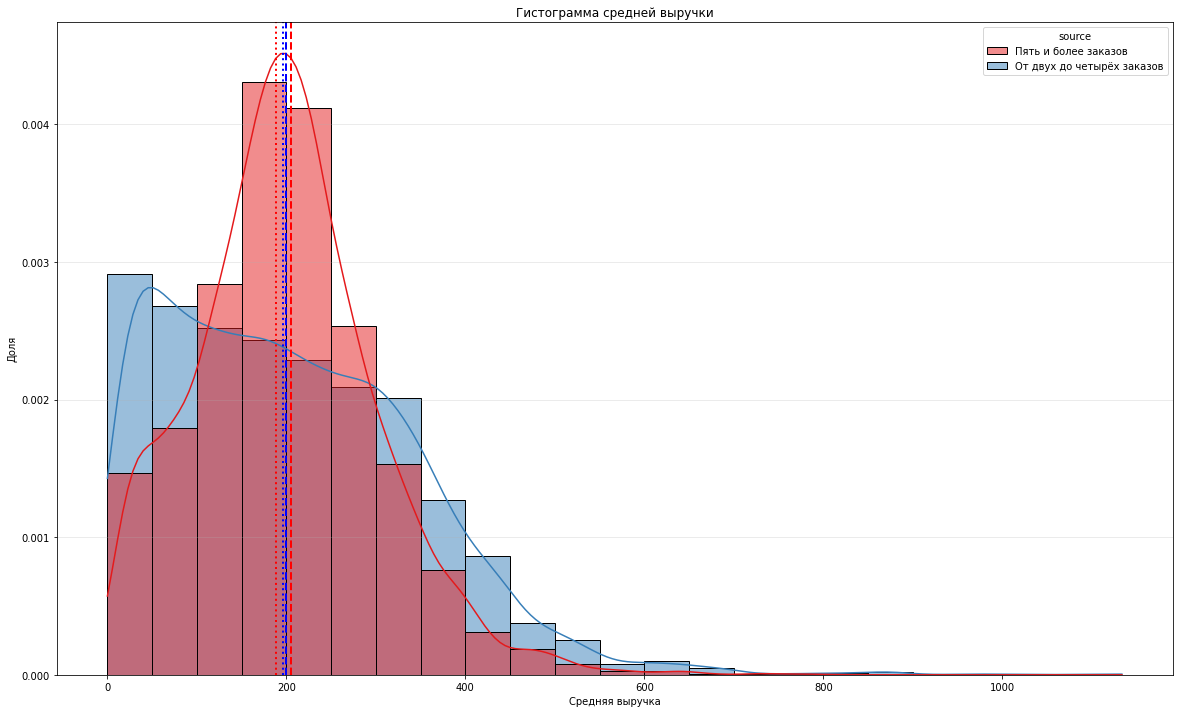

In [109]:
draw_compare_hist(avg_ticket_df, lambda df: df['is_five'] == True, 'Пять и более заказов', lambda df: ((df['is_two'] == True) & (df['is_five'] == False)), 'От двух до четырёх заказов')

<b>
    <p>Среднее значение выручки между расматриваемыми группами не отличается, составляет также в районе 200 рублей. Однако, это значение может быть обманчиво, т.к. на обоих графиках присутствует значительный хваос, который сильно завышает среднее</p>
    <p>Характер распределения отличается у обоих выборок. Для выборки с одним заказом можно сказать, что оно явным образом ассиметрично, имеет две моды, имеет большую дисперсию. Для выборки с двумя и более заказами можно сказать, что оно выглядит более симметричным</p>
</b>

<b>
    <p></p>
</b>

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ взаимосвязи средней выручки и числа заказов <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> Плюсик за грамотное оформление графиков - заголовок, подписи осей, легенда, поправка на размер выборки (`density`).

</div>

<div style="border-radius: 10px" class="alert alert-block alert-danger">

<b>Нужно доработать ❌:</b> С выводами во втром случае не соглашусь. Важно иметь в виду, что среднее значение как раз довольно сильно зависит от характера распределения, если есть какие-то сильные выбросы, они могут утянуть среднее значение вверх, хотя основная масса значений будет гораздо ниже. Здесь нужно анализировать характер распределения.

</div>


<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b>  
    
    
* С использованием `is_two` и `is_five` оба графика можно построить разом с помощью одной функции `seaborn`.
    
    
* Чтобы удобно было сопоставлять доли пользователей по диапазонам цен, можно настроить единый размер бинов (`bins = 50` фиксирует количество бинов, но размер между сегментами будет отличаться, поскольку диапазон значений у них разный). Для этого в `bins` можно передать границы для формирования бинов с шагом: `bins = range(min_value, max_value+1, 50)`, максимальное и минимальное значения при этом определяем на всей выборке, а не отдельно для каждого.


* Выводы очень поверхностные, особенно во втором случае. В выводах стоит выделить сегменты концентрации - резюмировать информацию с графиков в более понятные лаконичные диапазоны, при этом, в том числе обратить внимание на хвосты. А также попробовать подумать, что для нас могут значить результаты, почему они могли получиться именно такими, что это говорит о клиентах, об их стабильности? Это может быть полезно в плане развития стратегий по привлечению новых пользователей.


* Каков итоговый вывод по анализу выручки? Какие инсайты мы получили?
    
    
* Напоминаю про моменты, которые уже упоминала выше: длина строки кода.
    
</div>

<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера 2 ✅<a class="tocSkip"></h3>

---

**Задача 4.2.3.** Проанализируйте влияние среднего количества билетов в заказе на вероятность повторной покупки.

- Изучите распределение пользователей по среднему количеству билетов в заказе (`avg_tickets_count`) и опишите основные наблюдения.
- Разделите пользователей на несколько сегментов по среднему количеству билетов в заказе:
    - от 1 до 2 билетов;
    - от 2 до 3 билетов;
    - от 3 до 5 билетов;
    - от 5 и более билетов.
- Для каждого сегмента подсчитайте общее число пользователей и долю пользователей, совершивших повторные заказы.
- Ответьте на вопросы:
    - Как распределены пользователи по сегментам — равномерно или сконцентрировано?
    - Есть ли сегменты с аномально высокой или низкой долей повторных покупок?

---

In [110]:
bins = [0, 2, 3, 5, 1000]
labels = ['1-2 билета', '2-3 билета', '3-5 билетов', '5 и более билетов']

avg_tickets_count_df = pdf.copy()

avg_tickets_count_df['ticket_segment'] = pd.cut(pdf['avg_tickets_count'], bins=bins, labels=labels, right=True)

avg_tickets_count_df.groupby('ticket_segment').aggregate(
{
    'user_id': 'count',
    'is_two': 'mean'
})

/tmp/ipykernel_294/178177483.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tickets_count_df.groupby('ticket_segment').aggregate(


,user_id,is_two
ticket_segment,,
1-2 билета,6181,0.402686
2-3 билета,10231,0.750367
3-5 билетов,5109,0.601879
5 и более билетов,0,NaN


<b>
    <p>Пользователи распределены неравномерною Больше всего повторных покупок в сегменте 2-3 билета (9014), меньше всего в 5 и более билетов (194).</p>
    <p>Сешментов с аномалиями не наблюдается.</p>
</b>

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ взаимосвязи количества билетов в заказе и возвращаемости <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b>

* Здесь все окей, справились!


* Здорово, что используешь удобный метод [сut](https://pandas.pydata.org/docs/reference/api/pandas.cut.html).
   
</div>
<div style="border-radius: 10px" class="alert alert-warning">
    
<b>Рекомендации💡:</b>

* Необходимо только пересмотреть настройки параметров, сейчас у тебя первый сегмент включает обе границы, а последний не включает их вовсе. Сейчас по всему диапазону у нас есть фиксированное ограничение снизу, и нет ограничения сверху, по такой же логике стоит формировать и сегменты - включать левую границу и исключать правую.


* Для удобства анализа было бы не лишним построить визуализацию.


* Сейчас ты просто пересказываешь результаты, но это не является аналитикой. Анализ заключается в интерпретации полученных результатов, вытаскивании инсайтов, составлении какого-то представления/характеристики на основе полученных данных, пояснении того, что для нас это значит, почему могло получиться именно так. Именно эти суждения для нас ценны, цифры являются лишь подкреплением. В выводах было бы неплохо предположить, что это за группы у нас сформировались (что за типы клиентов), и почему получились именно такие результаты по возвращаемости. Опять же, это может быть полезно в плане развития стратегий по привлечению новых пользователей.

</div>

---

#### 4.3. Исследование временных характеристик первого заказа и их влияния на повторные покупки

Изучите временные параметры, связанные с первым заказом пользователей:

- день недели первой покупки;
- время с момента первой покупки — лайфтайм;
- средний интервал между покупками пользователей с повторными заказами.

---

**Задача 4.3.1.** Проанализируйте, как день недели, в которой была совершена первая покупка, влияет на поведение пользователей.

- По данным даты первого заказа выделите день недели.
- Для каждого дня недели подсчитайте общее число пользователей и долю пользователей, совершивших повторные заказы. Результаты визуализируйте.
- Ответьте на вопрос: влияет ли день недели, в которую совершена первая покупка, на вероятность возврата клиента?

---


In [111]:
weekday_df = pdf.copy()

weekday_df['weekday'] = pdf['first_order_dt'].dt.day_name()

agg_weekday_df = weekday_df.groupby('weekday').aggregate(
{
 'is_two': ['sum', 'mean']   
})

new_columns = []
for col, agg in agg_weekday_df.columns:
    new_columns.append(f"{col}_{agg}")

agg_weekday_df.columns = new_columns
agg_weekday_df = agg_weekday_df.reset_index()

agg_weekday_df

,weekday,is_two_sum,is_two_mean
0,Friday,1919,0.597633
1,Monday,1800,0.623269
2,Saturday,2154,0.638601
3,Sunday,1679,0.607233
4,Thursday,1843,0.596054
5,Tuesday,1941,0.618153
6,Wednesday,1905,0.624181


In [112]:
def draw_bar_repeats(df, column_name, ylabel, title):
    df.plot.bar(
        x='weekday',
        y=column_name,
        figsize=(20,12),
        title=title
    )
    plt.xlabel('День недели')
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()
    plt.close()
    

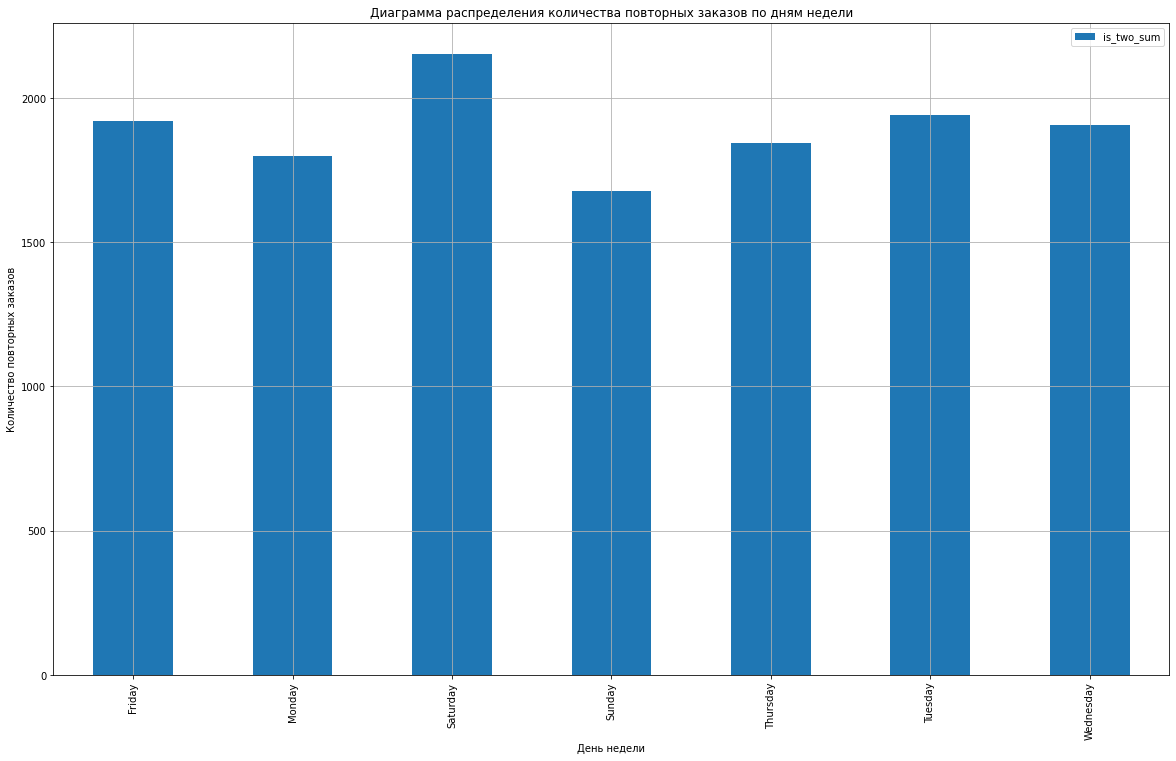

In [113]:
draw_bar_repeats(agg_weekday_df[['weekday', 'is_two_sum']], 'is_two_sum', 'Количество повторных заказов', 'Диаграмма распределения количества повторных заказов по дням недели')

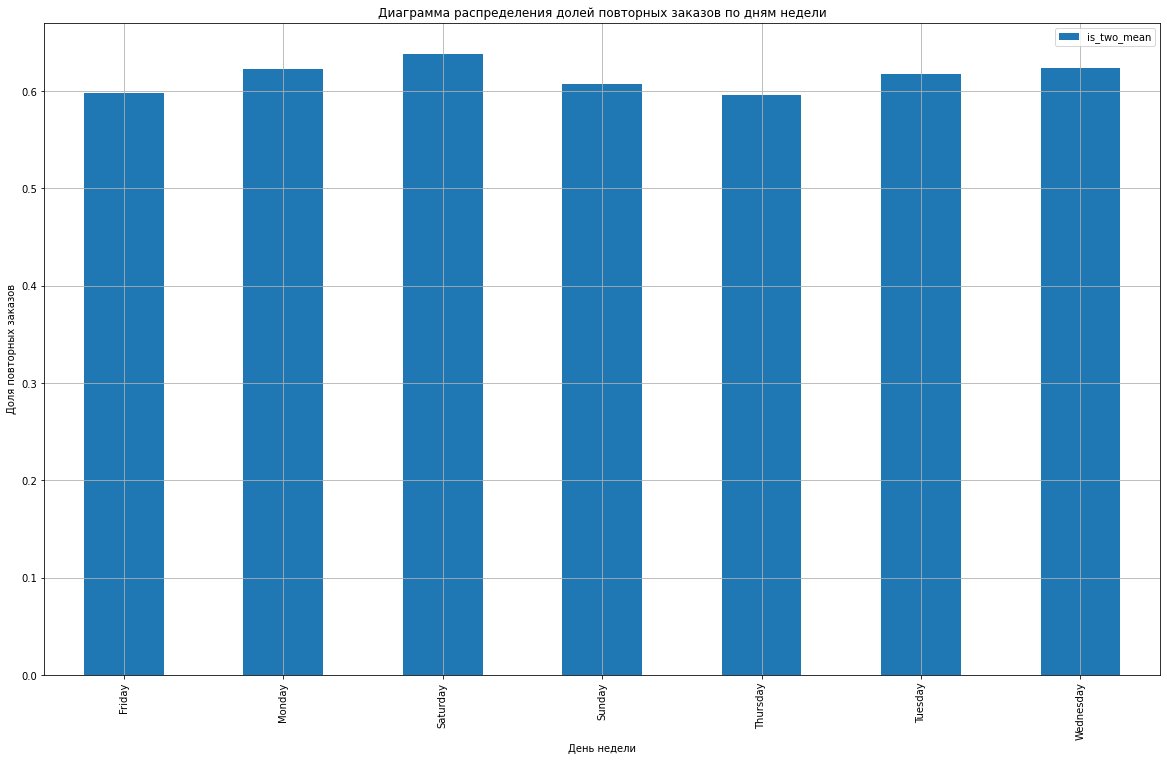

In [114]:
draw_bar_repeats(agg_weekday_df[['weekday', 'is_two_mean']], 'is_two_mean', 'Доля повторных заказов', 'Диаграмма распределения долей повторных заказов по дням недели')

<b>
    <p>В целом зависимости от дня недели нет. Единственное, вероятность повторных заказов будет меньше, если первый заказ сделан в воскресенье.</p>
</b>

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ возвращаемости по дням недели  <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> Здесь все корректно. Различия по дням недели все же наблюдаются, хотя и не очень заметные. Чтобы судить более однозначно, было бы неплохо сопроводить сравнение оценкой статистической значимости. Это будет изучаться далее на курсе.

</div>
<div style="border-radius: 10px" class="alert alert-warning">
    
<b>Рекомендации 💡:</b>

* Есть метод, который позволяет сразу вытаскивать наименования: `.dt.day_name()`.


* Для удобства на график можно добавить линию общей возвращаемости, чтобв четко видеть, какие дни куд и насколько отклоняются.


* В выводах было бы неплохо также предположить, почему в топ и антитоп (которые все-таки создается, хотя и на так явно) выбиваются определенные дни недели? Какие суждения относительно этого можно выстроить?

    
* Напоминаю про моменты, которые уже упоминала выше: длина строки кода.
    

</div>

---

**Задача 4.3.2.** Изучите, как средний интервал между заказами влияет на удержание клиентов.

- Рассчитайте среднее время между заказами для двух групп пользователей:
    - совершившие 2–4 заказа;
    - совершившие 5 и более заказов.
- Исследуйте, как средний интервал между заказами влияет на вероятность повторного заказа, и сделайте выводы.

---


In [115]:
def draw_compare_days_since_prev_hist(left, right, df_label_left, df_label_right):

    plt.figure(figsize=(20, 12))
    
    left['source'] = df_label_left
    
    right['source'] = df_label_right
    
    combined = pd.concat([left, right], ignore_index=True)
    
    combined['days_since_prev'] = pd.to_numeric(combined['days_since_prev'], downcast='float')
    
    hist = sns.histplot(
        data=combined,
        x='days_since_prev',
        hue='source',
        stat='density',
        common_norm=False,
        alpha=0.5,
        palette='Set1',
        edgecolor='black',
        bins = 183,
        legend=True,
        kde=True
    )
    
    left_mean = left['days_since_prev'].mean()
    left_median = left['days_since_prev'].median()

    hist.axvline(left_mean, color='blue', linestyle="--", linewidth=2, label="Mean")
    hist.axvline(left_median, color='blue', linestyle=":", linewidth=2, label="Median")

    right_mean = right['days_since_prev'].mean()
    right_median = right['days_since_prev'].median()

    hist.axvline(right_mean, color='red', linestyle="--", linewidth=2, label="Mean")
    hist.axvline(right_median, color='red', linestyle=":", linewidth=2, label="Median")

    plt.xlabel('Средняя количество дней между заказами')
    plt.ylabel('Доля пользователей')
    plt.title('Гистограмма средней выручки')
    plt.grid(axis='y', alpha=0.3)

    plt.show()
    plt.close()

In [116]:
days_since_prev_mean_df = pdf.copy()
days_since_prev_mean_df['days_since_prev'] = pdf['avg_days_since_prev'] * pdf['total_orders']

days_since_prev_mean_24_df = \
    days_since_prev_mean_df[(days_since_prev_mean_df['is_two'] == True) & (days_since_prev_mean_df['is_five'] == False)].copy()
days_since_prev_mean_5_df = \
    days_since_prev_mean_df[(days_since_prev_mean_df['is_five'] == True)].copy()

days_since_prev_mean_24 = \
    days_since_prev_mean_24_df['days_since_prev'].sum() / days_since_prev_mean_24_df['total_orders'].sum()
days_since_prev_mean_5 = \
    days_since_prev_mean_5_df['days_since_prev'].sum() / days_since_prev_mean_5_df['total_orders'].sum()

print('Среднее время между заказами у пользователей совершивших 2-4 заказа', days_since_prev_mean_24)
print('Среднее время между заказами у пользователей совершивших 5 заказов', days_since_prev_mean_5)

Среднее время между заказами у пользователей совершивших 2-4 заказа 20.203095725867172
Среднее время между заказами у пользователей совершивших 5 заказов 3.663039915344063


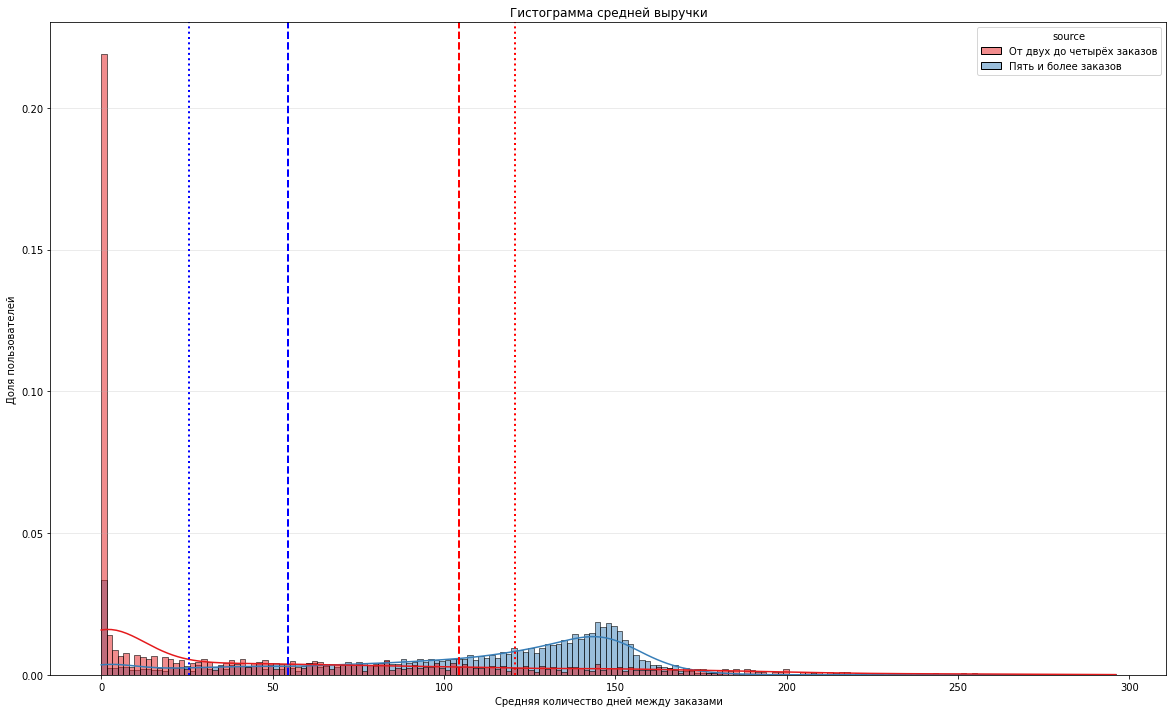

In [117]:
draw_compare_days_since_prev_hist(days_since_prev_mean_24_df, days_since_prev_mean_5_df, 'От двух до четырёх заказов', 'Пять и более заказов')

<b>
    <p>Прослеживается зависимость, чем больше заказов совершает пользователь, тем меншь интервал между эти заказами, однакок, что то сказать про вероятность повторного заказа по параметру days_since_prev сложно. Все юзеры, у которых этот параметр указан уже совершили повторный заказ. Также, логично, что в среднем время снижается при увеличении количества заказов, т.к. исследуется фиксированный интервал времени. На построенной гистограмме явно видно, что в основном заказы совершают почти в тот же день при количестве заказов от двух до четырех. Вероятно, берут билеты себе и сразу другим заказом докупают другу. Среди тех, кто делает 5 и более заказов присутствует много редко покупающих билеты, сконцентрированы в рйоне 150 дней/p> 
<b>

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ возвращаемости по количеству дней между заказами <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> По расчетам в целом верно.
     
</div>

<div style="border-radius: 10px" class="alert alert-block alert-danger">
    
<b>Нужно доработать ❌:</b> Важно иметь в виду, что среднее значение как раз довольно сильно зависит от характера распределения, если есть какие-то сильные выбросы, они могут утянуть среднее значение вверх, хотя основная масса значений будет гораздо ниже. Поэтому здесь удобнее было бы построить гистограммы (как мы это делали при сравнении выручки), чтобы можно было полноценно сравнить их характер распределения.
    
</div>
    
<div style="border-radius: 10px" class="alert alert-warning">
    
<b>Рекомендации 💡:</b>


* Особенно важно в данном случае настроить единый размер бинов для гистограмм. Иначе из-за различий в диапазонах характер графиков уж слишком отличается. Также стоит добавить сетку, чтобы удобнее было ориентироваться на графике.
    
    
* Логично, что на ограниченном промежутке времени у клиента с большим количеством заказов интервалы будут меньше. Поэтому здесь стоит делать обратный ход - подумать, как по интервалу времени после очередного заказа можно определять, есть ли шанс, что клиент еще вернется самостоятельно, или пора подключать стратегии для вовлечения в новый заказ.
    
    
* Напоминаю про моменты, которые уже упоминала выше: длина строки кода, вывод значений на печать.
   
</div>


<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера 2 <a class="tocSkip"></h3>
    
<div style="border-radius: 10px" class="alert alert-block alert-danger">
    
<b>Нужно доработать ❌:</b> Сейчас ты пытаешься анализировать не среднее количество дней между заказами, а общий лайфтайм клиента. Причем при домножении на количество заказов нет корректировки на минус единицу (интервалов между заказами у нас меньше, чем самих заказов), из-за чего по факту получаешь лайфтайм + средний интервал. По этой причине и так редко приходящие польователи сильно разъехались вширь.
    
Нам здесь ничего трансформировать не нужно. Просто берем количество дней из таблицы с профилями и строим распределения внутри двух групп.
    
</div>

---

#### 4.4. Корреляционный анализ количества покупок и признаков пользователя

Изучите, какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок. Для этого используйте универсальный коэффициент корреляции `phi_k`, который позволяет анализировать как числовые, так и категориальные признаки.

---

**Задача 4.4.1:** Проведите корреляционный анализ:
- Рассчитайте коэффициент корреляции `phi_k` между признаками профиля пользователя и числом заказов (`total_orders`). При необходимости используйте параметр `interval_cols` для определения интервальных данных.
- Проанализируйте полученные результаты. Если полученные значения будут близки к нулю, проверьте разброс данных в `total_orders`. Такое возможно, когда в данных преобладает одно значение: в таком случае корреляционный анализ может показать отсутствие связей. Чтобы этого избежать, выделите сегменты пользователей по полю `total_orders`, а затем повторите корреляционный анализ. Выделите такие сегменты:
    - 1 заказ;
    - от 2 до 4 заказов;
    - от 5 и выше.
- Визуализируйте результат корреляции с помощью тепловой карты.
- Ответьте на вопрос: какие признаки наиболее связаны с количеством заказов?

---

In [118]:
phik_df = pdf.copy()

phik_df['month'] = phik_df['first_order_dt'].dt.month.astype('category')
phik_df['day'] = phik_df['first_order_dt'].dt.day.astype('category')
phik_df['dayofweek'] = phik_df['first_order_dt'].dt.dayofweek.astype('category')

phik_df = phik_df.drop(columns=['user_id', 'first_order_dt', 'last_order_dt'])

print('Колонки, по которым строим корреляцию:', list(phik_df.columns))

Колонки, по которым строим корреляцию: ['first_device', 'first_region_name', 'first_service_name', 'first_event_type', 'total_orders', 'avg_revenue_rub', 'avg_tickets_count', 'avg_days_since_prev', 'is_two', 'is_five', 'month', 'day', 'dayofweek']


In [119]:
def draw_heatmap(df, column_name):
    interval_cols = ['first_order_dt', 'last_order_dt', 'avg_revenue_rub', 'avg_tickets_count', 'avg_days_since_prev', 'total_orders']

    phik_matrix = df.phik_matrix(
        interval_cols=interval_cols
    )[[column_name]]
    
    plt.figure(figsize=(10, 8))

    sns.heatmap(
        phik_matrix,
        annot=True,
        cmap='coolwarm',
        center=0,
        square=True,
        fmt='.2f',
        cbar_kws={'shrink': 0.8}
    )

    plt.title('Хитмэп взаимосвязей параметров', fontsize=16, pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    plt.close()

<b>Расчитаем сегменты для каждого пользователя в выборке</b>

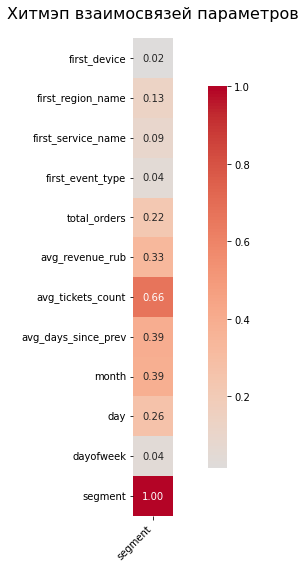

In [120]:
segmented_phik_df = phik_df.copy()

def set_segment(row):
    if row['is_two'] == False:
        return '1 заказ'
    if row['is_five'] == True:
        return '5 и более заказов'
    
    return '2 заказа'

segmented_phik_df['segment'] = segmented_phik_df.apply(set_segment, axis=1)

segmented_phik_df = segmented_phik_df.drop(columns=['is_two', 'is_five']).copy()

draw_heatmap(segmented_phik_df, 'segment')

<b>
    <p>Наибольшая зависимость segment(а следовательно и количества заказов) прослеживается с avg_ticket_count, avg_days_since_prev, month, avg_revenue_rub, day. Корреляция с first_event_type, first_device, dayofweek около нулевая.</p>
</b>

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ корреляции <a class="tocSkip"></h4>


<div style="border-radius: 10px" class="alert alert-block alert-danger">
    
<b>Нужно доработать ❌:</b> Обрати внимание, что сейчас мы исследуем влияние факторов на то, насколько активным окажется пользователь (с точки зрения количества заказов), поэтому сегментация количества заказов нам нужна была для того, чтобы сделать интервалы более сбалансированными по составу в противовес тому биннингу, который происходит автоматически в алгоритме Phik, когда мы передаем ему количественный признак. Отсюда следует, что корреляцию нужно проверять не внутри сегментов между факторами, а факторов с самими сегментами.

</div> 
   
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 

* В анализ имеет смысл включить день недели. При этом в `is_two` `is_five` смысла нет - это производные признака количества заказов, они не расскажутт нам ничего интересного.


* Чтобы искать взаимосвязи с датами, нужно дробить их на отдельные составляющие, которые варьируются в данных (год, месяц, день недели, час, все категориальные, кроме года). Однако обрати внимание, что мы сейчас изучаем корреляцию с количеством заказов, но количество заказов, которые он успел сделать, непременно будет зависеть от того, насколько близко к концу охваченного нами периода он присоединился. Такая оценка не расскажет нам ничего интересного. Чтобы изучать, насколько сильно варьируется качество привлеченных клиентов (с точки зрения количества их последующих заказов) в зависимости от времени, необходимо фиксировать период обзора с момента их присоединения, чтобы все клиенты были в равных условиях при оценке.

   
* Напомню, что Phik корреляция всегда имеет положительные значения. Данная корреляция не говорит о направленности взаимосвязи, только о ее силе. Поэтому некорректно строить суждения, что чем больше что-то одно, тем больше/меньше что-то другое. О направленности мы можем лишь предполагать, полагаясь на логику и здравый смысл, либо же подкреплять суждения результатами предыдущих шагов. Если ты хочешь добавить про направленность, то важно оставить пояснение, на основе чего мы это говорим.
    

*  В выводах было бы неплохо провести параллель с нашими предыдущими шагами анализа. Прокомментировать, почему высокая корреляция получается с одними признаками и низкая с другими. Что по итогу важно для манипулирования возвращаемостью клиентов, а что нет?
    
    
* Напоминаю про моменты, которые уже упоминала выше: длина строки кода.

</div>

<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера 2 ✅<a class="tocSkip"></h3>

### 5. Общий вывод и рекомендации

В конце проекта напишите общий вывод и рекомендации: расскажите заказчику, на что нужно обратить внимание. В выводах кратко укажите:

- **Информацию о данных**, с которыми вы работали, и то, как они были подготовлены: например, расскажите о фильтрации данных, переводе тенге в рубли, фильтрации выбросов.
- **Основные результаты анализа.** Например, укажите:
    - Сколько пользователей в выборке? Как распределены пользователи по числу заказов? Какие ещё статистические показатели вы подсчитали важным во время изучения данных?
    - Какие признаки первого заказа связаны с возвратом пользователей?
    - Как связаны средняя выручка и количество билетов в заказе с вероятностью повторных покупок?
    - Какие временные характеристики влияют на удержание (день недели, интервалы между покупками)?
    - Какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок согласно результатам корреляционного анализа?
- Дополните выводы информацией, которая покажется вам важной и интересной. Следите за общим объёмом выводов — они должны быть компактными и ёмкими.

В конце предложите заказчику рекомендации о том, как именно действовать в его ситуации. Например, укажите, на какие сегменты пользователей стоит обратить внимание в первую очередь, а какие нуждаются в дополнительных маркетинговых усилиях.

   <b>В рамках проведенного исследования использовались данные базы данных Афиши. В ходе чистки были удалены 3404 строк по причинам аномальности данных (отрицательные значения прибыли, выбросы). Была проведена корректировка в рубли значения выручки на основании динамики курса тенге-рубль. Также была проведена корректировка типов данных в колонках на меньшую размерность. Данных с пропусками не обнаружено, они встречаются в days_since_prev, однако NaN имеет смысл. Это первый заказ пользователя.</b>

<b>Анализировались данные по 21521 пользователям. Распределены по количеству заказов следующим образом 1-2 билета 0.402686, 2-3 билета, 0.750367, 3-5 билетов, 0.601879.</b>

<b>В ходе исследования проводился анализ возвращаемости пользователя в зависимости от региона, типа события, сервиса партнера и типа устройства. Чаще всего возвращаются пользователи совершившие заказ с компьютера, из Озеропольской области, с сервиса Быстрый кассир, выставки </b>

<b>Количество покупок с двумя тремя билетами самое большое среди всех и составляет 7482 (2.6%). Также вероятность того, что пользователь совершит вторую покупку выше, если он берет больше билетов.</b>

<b>День недели не влияет на удержание клиента. Интервалы между покупками, дата начала первой, последней покупки сильно коррелируютс с количеством заказов.</b>

<b>Наибольшая зависимость total_orders прослеживается с avg_ticket_count, avg_days_since_prev, month, avg_revenue_rub, day. Корреляция с first_event_type, first_device, dayofweek около нулевая.</b>

<b>Общие рекоммендации</b>
<b>По данным заметно, что наибольшее количество первых заказов делается с мобильных устройств, но доля возвратившихся среди них ниже, чем у совершивших первый заказ с компьютера. Стоит уделять больше внимания именно мобильным клиентам, эффект от развития мобильных приложений будет выше, чем от развития десктопных.</b>

<b>Сервис "Билеты без проблем" хоть и составляет большинство первых заказов, однако доля возвратившихся с этого сервиса крайне низкая и не входит даже в топ 10. В своб очередь топ 3 сервиса по возвращению Быстрый кассир, Реестр? Crazy ticket! не входит в топ 10 партнеров по количеству билетов. Стоит попробовать увеличить количество билетов купленных через них, что приведет как к росту прибыли от пользователей совершающих первый заказ, так и повысит прибыль от их повторного заказа в дальнейшем.</b>

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Итоговые выводы <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> Здорово, что завершаешь проект рекомендациями, идеями маркетинговых стратегиях подогревания и удержания. 

</div>

<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 

* Итоговые выводы не совсем содержательны. Отмечено, что наблюдается с точки зрения статистик, но из этого не выделено полезных биинс-инсайтов. Это большое упущение, ведь исследовательский анализ именно в этом и заключался.
    

    
* В отношении рекомендаций на самом деле характеристики первого заказа играют не такую значительную роль. Поведенческие характеристики показали куда большее влияние на возвращаемость. Стоит подумать, что стоит предложить с этой стороны.
    

</div>

<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера 2 ✅<a class="tocSkip"></h3>

### 6. Финализация проекта и публикация в Git

Когда вы закончите анализировать данные, оформите проект, а затем опубликуйте его.

Выполните следующие действия:

1. Создайте файл `.gitignore`. Добавьте в него все временные и чувствительные файлы, которые не должны попасть в репозиторий.
2. Сформируйте файл `requirements.txt`. Зафиксируйте все библиотеки, которые вы использовали в проекте.
3. Вынести все чувствительные данные (параметры подключения к базе) в `.env`файл.
4. Проверьте, что проект запускается и воспроизводим.
5. Загрузите проект в публичный репозиторий — например, на GitHub. Убедитесь, что все нужные файлы находятся в репозитории, исключая те, что в `.gitignore`. Ссылка на репозиторий понадобится для отправки проекта на проверку. Вставьте её в шаблон проекта в тетрадке Jupyter Notebook перед отправкой проекта на ревью.

https://github.com/adons2004/afisha

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Публикация в Git <a class="tocSkip"></h4>
    
<div style="border-radius: 10px" class="alert alert-warning">
    
<b>Рекомендации💡:</b> Сейчас работу с Git сделали необязательной, но отмечу довольно критичные моменты.

* <span style="color:Red;">В репозитории не должно быть опубликовано данных и ключей для доступа к ним (как в `.env`, так и в самой тетрадке, в том числе в тексте задания), это считается засекреченной информацией. Можно оставить лишь `env_exaple`, чтобы читатели, желающие запустить код, вставили туда свои собственные ключи. Сам `.env необходимо отправить в игнорирование.</span>


* Сейчас у тебя выложена незапущенная тетрадка, в таком виде она довольно бесполезна, поскольку читатель не сможет ее запустить самостоятельно, так как у него не будет доступа к данным.


* В `requirements.txt` не принято дозволять как более новые, так и более старые версии библиотек. В какой-то момент это может привести к конфликту версий. Поэтому необходимо фиксировать ровно то, что было использовано:
    
    ```python
pandas==2.2.2
numpy==1.26.4
matplotlib==3.9.2
...
```

* Можно заполнить `readme` полезной информацией о проекте, зафиксировать цели, указать ключевые моменты и полученные выводы.

</div>


<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера 2 <a class="tocSkip"></h3>
    
Сейчас ключи еще остались внутри тетрадки - в тексте задания и непосредственно при подключении к БД.

<div style="border:solid Green 2px; border-radius: 10px;  padding: 40px">
<h3>Общий вывод по проекту <a class="tocSkip"></h3>
    
Антон, спасибо за твой проект! У тебя неплохая работа! В тебе видны зачатки будущего профессионала своего дела :) Однако есть еще моменты, которые требуют твоего внимания. Кратко пройдусь по впечатлениям. 
    
**Полнота:** все требуемые задачи были выполнены!
    
**Корректность:** 

* <span style="color:Red;">Необходимо засекретить подключение к БД, чтобы не скомпрометировать явки и пароли.</span>
* <span style="color:Red;">Необходимо расширить предобработку данных. Проверка на наличие дубликатов - один из важных этапов предобработки по умолчанию.</span>
* <span style="color:Red;">Заполнение пропусков в количестве дней между заказами в данном проекте нам не доступно. Любое значение будет искажать статистические показатели.</span>
* <span style="color:Red;">При создании профиля сортировать необходимо по времени, а не только по дате.</span>
* <span style="color:Red;">Любой раздел необходимо завершать резюмирующими выводами.</span>
* <span style="color:Red;">Необходимо пересмотреть выводы в отношении гипотезы по сегментам, сформированным первыми заказами.</span>
* <span style="color:Red;">Необходимо пересмотреть выводы в отношении взаимосвязи выручки и возвращаемости.</span>
* <span style="color:Red;">Необходимо пересмотреть выводы по анализу среднего количества дней между заказами.</span>
* <span style="color:Red;">Необходимо пересмотреть оценку корреляции.</span>

**Аналитическая проницательность:** ты верно подмечаешь ключевые нюансы данных. Но стоит чуть углубить суждения, фиксировать не только то, что наблюдаем, но и предполагать, почему получилось именно так, что это значит для бизнеса.
    
**Эффективность кода:** по этому критерию в целом все окей! В некоторых местах можно использовать чуть более удобные и компактные методы, зафункционалить повторяющиеся действия. Стоит обратить внимание на длину строки с кодом.
    
**Оформление:** им тоже важно не пренебрегать! Оформление тесно связано с удобством восприятия предоставляемой информации и созданием впечатления о работе. Твоя работа в целом довольно структурна - выделены разделы, грамотно оформлены графики, но еще есть некоторый потенциал для улучшений (смотри по ходу работы).

    
**Желаю удачи и жду твой проект на повторное ревью!** 😉
    
<img src="https://99px.ru/sstorage/86/2015/12/image_86271215043043632690.gif" />

<div style="border:solid Green 2px; border-radius: 10px;  padding: 40px">
<h3>Общий вывод по проекту 2<a class="tocSkip"></h3>
    
На данный момент актуальны остаются следующие моменты:
    
* <span style="color:Red;">Пересмотреть сортировку при формировании таблицы с профилями.</span>
* <span style="color:Red;">Пересмотреть анализ среднего количества дней между заказами.</span>
    
**Желаю удачи и жду твой проект на повторное ревью!** 😉